# Applying Temporal Convolutional Network (TCN) to time series forecasting of Well and Riser flow rates

## Author: Ridha Alkhabaz

This is notebook to explore Prophet algorithm viability to predict mass flow rates in a well. Specifically, we are investigating gas volume flow rate in this notebook. 


## Imports:

In [2]:
import os
os.chdir('/Users/ridhaalkhabaz/Documents/GitHub/VFM_ML/src')
from preprocessing import read_data_well, multivariate_data, univariate_data, dataframe
from configuration import configure 
os.chdir("/Users/ridhaalkhabaz/Documents/GitHub/VFM_ML")
from main import model_init, model_train, model_predict
# for tcn applications
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, RepeatVector
from tensorflow.keras.preprocessing import sequence
from tcn import TCN
import tensorflow as tf
# for data configurations
import sys
import json
import random
import pandas as pd
import matplotlib.pyplot as plt
from numpy import array
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import adjusted_rand_score
import datetime as dttm

#### Reading the data and visualization:
We use the previous operation period to predict the fifth one. We did some padding between the operation period to make sure that TCN observes the gradual trend to steady-state. 

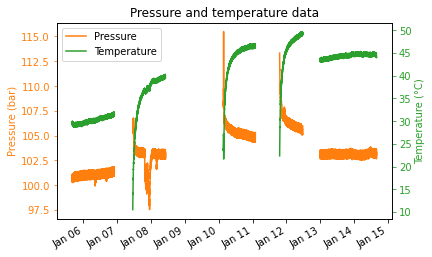

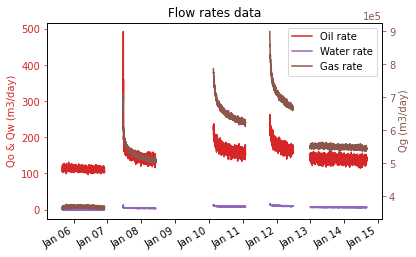

In [6]:
fp, headers, _ = read_data_well('welltest.csv', plot_data=True)
df_pd = dataframe(fp, ['ds', 'pressure', 'temperature', 'oil', 'water', 'gas'], True, True)
df = dataframe(fp, ['ds', 'pressure', 'temperature', 'oil', 'water', 'gas'], False, True)
df = df.drop(['ds'], axis=1)
df_pd = df_pd.drop(['ds'], axis=1)
### Univariate model 
train_uni_gas = np.array(df['gas'])
train_uni_gas_pd = np.array(df_pd['gas'])
## multivariate 
train_mult_gas = pd.concat([df.iloc[:, 0:2], df['gas']], axis=1)
train_mult_gas_pd = pd.concat([df_pd.iloc[:, 0:2], df_pd['gas']], axis=1)
train_mult_gas_t = pd.concat([df.iloc[:, 0:2],df['time'], df['gas'], df['gas']], axis=1)
train_mult_gas_t_pd = pd.concat([df_pd.iloc[:, 0:2],df_pd['time'], df_pd['gas'], df_pd['gas']], axis=1)
train_mult_gas_prv = pd.concat([df.iloc[:, 0:2],df['gas'], df['gas']], axis=1)
train_mult_gas_prv_pd = pd.concat([df_pd.iloc[:, 0:2],df_pd['gas'], df_pd['gas']], axis=1)
## hyperparameters for out models
basic = {'input_shape':(300,1), 'dropout_rate':0.2}
basic_mult = {'input_shape':(300,2), 'dropout_rate':0.2}
basic_mult_pst = {'input_shape':(300,3), 'dropout_rate':0.2}
basic_mult_psT = {'input_shape':(300,4), 'dropout_rate':0.2}
tuned = {'input_shape':(300,1), 'nb_filters':32, 'kernel_size':3, 'dilations':(1, 2, 4, 8, 16), 'dropout_rate':0.2}
tuned_mult = {'input_shape':(300,2), 'nb_filters':32, 'kernel_size':3, 'dilations':(1, 2, 4, 8, 16), 'dropout_rate':0.2}
tuned_mult_pst = {'input_shape':(300,3), 'nb_filters':32, 'kernel_size':3, 'dilations':(1, 2, 4, 8, 16), 'dropout_rate':0.2}
tuned_mult_pstT = {'input_shape':(300,4), 'nb_filters':32, 'kernel_size':3, 'dilations':(1, 2, 4, 8, 16), 'dropout_rate':0.2}

#### Initialization:
We are trying to find the difference between univariate, multivairate, tuned and basic implementation of TCN. 

In [7]:
tcn_gas_basic_uni_whole= model_init(model='TCN', params=['past_readings'], \
                           hyperparamters=[basic, 5]) #
tcn_gas_basic_uni_daily= model_init(model='TCN', params=['past_readings'], \
                           hyperparamters=[basic, 5]) #
tcn_gas_basic_uni_daily_pd= model_init(model='TCN', params=['past_readings'], \
                           hyperparamters=[basic, 5]) #

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
tcn (TCN)                    (None, 64)                136256    
_________________________________________________________________
dense (Dense)                (None, 5)                 325       
Total params: 136,581
Trainable params: 136,581
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
tcn_1 (TCN)                  (None, 64)                136256    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 325       
Total params: 136,581
Trainable params: 136,581
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_2"


In [8]:
tcn_gas_uni_tuned_whole = model_init(model='TCN', params=['past_readings'], \
                           hyperparamters=[tuned, 5]) #
tcn_gas_uni_tuned_daily = model_init(model='TCN', params=['past_readings'], \
                           hyperparamters=[tuned, 5]) #
tcn_gas_uni_tuned_daily_pd = model_init(model='TCN', params=['past_readings'], \
                           hyperparamters=[tuned, 5]) #

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
tcn_3 (TCN)                  (None, 32)                28128     
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 165       
Total params: 28,293
Trainable params: 28,293
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
tcn_4 (TCN)                  (None, 32)                28128     
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 165       
Total params: 28,293
Trainable params: 28,293
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_5"
__

In [9]:
tcn_gas_mult_basic_whole = model_init(model='TCN', params=['past_readings', 'pressure readings'], \
                           hyperparamters=[basic_mult, 5]) #
tcn_gas_mult_basic_daily = model_init(model='TCN', params=['past_readings', 'pressure readings'], \
                           hyperparamters=[basic_mult, 5]) #
tcn_gas_mult_basic_daily_pd = model_init(model='TCN', params=['past_readings', 'pressure readings'], \
                           hyperparamters=[basic_mult, 5]) #

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
tcn_6 (TCN)                  (None, 64)                136512    
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 325       
Total params: 136,837
Trainable params: 136,837
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
tcn_7 (TCN)                  (None, 64)                136512    
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 325       
Total params: 136,837
Trainable params: 136,837
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_8

In [10]:
tcn_gas_mult_basic_whole_pst = model_init(model='TCN', params=['past_readings', 'pressure readings'], \
                           hyperparamters=[basic_mult_pst, 5]) #
tcn_gas_mult_basic_daily_pst= model_init(model='TCN', params=['past_readings', 'pressure readings'], \
                           hyperparamters=[basic_mult_pst, 5]) #
tcn_gas_mult_basic_daily_pd_pst = model_init(model='TCN', params=['past_readings', 'pressure readings'], \
                           hyperparamters=[basic_mult_pst, 5]) #

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
tcn_9 (TCN)                  (None, 64)                136768    
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 325       
Total params: 137,093
Trainable params: 137,093
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
tcn_10 (TCN)                 (None, 64)                136768    
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 325       
Total params: 137,093
Trainable params: 137,093
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_

In [11]:
tcn_gas_mult_basic_whole_pstT = model_init(model='TCN', params=['past_readings', 'pressure readings'], \
                           hyperparamters=[basic_mult_psT, 5]) #
tcn_gas_mult_basic_daily_pstT= model_init(model='TCN', params=['past_readings', 'pressure readings'], \
                           hyperparamters=[basic_mult_psT, 5]) #
tcn_gas_mult_basic_daily_pd_pstT = model_init(model='TCN', params=['past_readings', 'pressure readings'], \
                           hyperparamters=[basic_mult_psT, 5]) #

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
tcn_12 (TCN)                 (None, 64)                137024    
_________________________________________________________________
dense_12 (Dense)             (None, 5)                 325       
Total params: 137,349
Trainable params: 137,349
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
tcn_13 (TCN)                 (None, 64)                137024    
_________________________________________________________________
dense_13 (Dense)             (None, 5)                 325       
Total params: 137,349
Trainable params: 137,349
Non-trainable params: 0
_________________________________________________________________
Model: "sequential

In [12]:
tcn_gas_mult_tuned_whole = model_init(model='TCN', params=['past_readings', 'pressure readings'], \
                           hyperparamters=[tuned_mult, 5]) #
tcn_gas_mult_tuned_daily = model_init(model='TCN', params=['past_readings', 'pressure readings'], \
                           hyperparamters=[tuned_mult, 5]) #
tcn_gas_mult_tuned_daily_pd = model_init(model='TCN', params=['past_readings'], \
                           hyperparamters=[tuned_mult, 5]) #

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
tcn_15 (TCN)                 (None, 32)                28256     
_________________________________________________________________
dense_15 (Dense)             (None, 5)                 165       
Total params: 28,421
Trainable params: 28,421
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
tcn_16 (TCN)                 (None, 32)                28256     
_________________________________________________________________
dense_16 (Dense)             (None, 5)                 165       
Total params: 28,421
Trainable params: 28,421
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_17"

In [13]:
tcn_gas_mult_tuned_whole_pst = model_init(model='TCN', params=['past_readings', 'pressure readings'], \
                           hyperparamters=[tuned_mult_pst, 5]) #
tcn_gas_mult_tuned_daily_pst = model_init(model='TCN', params=['past_readings', 'pressure readings'], \
                           hyperparamters=[tuned_mult_pst, 5]) #
tcn_gas_mult_tuned_daily_pd_pst = model_init(model='TCN', params=['past_readings'], \
                           hyperparamters=[tuned_mult_pst, 5]) #

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
tcn_18 (TCN)                 (None, 32)                28384     
_________________________________________________________________
dense_18 (Dense)             (None, 5)                 165       
Total params: 28,549
Trainable params: 28,549
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
tcn_19 (TCN)                 (None, 32)                28384     
_________________________________________________________________
dense_19 (Dense)             (None, 5)                 165       
Total params: 28,549
Trainable params: 28,549
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_20"

In [14]:
tcn_gas_mult_tuned_whole_pstT = model_init(model='TCN', params=['past_readings', 'pressure readings'], \
                           hyperparamters=[tuned_mult_pstT, 5]) #
tcn_gas_mult_tuned_daily_pstT = model_init(model='TCN', params=['past_readings', 'pressure readings'], \
                           hyperparamters=[tuned_mult_pstT, 5]) #
tcn_gas_mult_tuned_daily_pd_pstT = model_init(model='TCN', params=['past_readings'], \
                           hyperparamters=[tuned_mult_pstT, 5]) #

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
tcn_21 (TCN)                 (None, 32)                28512     
_________________________________________________________________
dense_21 (Dense)             (None, 5)                 165       
Total params: 28,677
Trainable params: 28,677
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
tcn_22 (TCN)                 (None, 32)                28512     
_________________________________________________________________
dense_22 (Dense)             (None, 5)                 165       
Total params: 28,677
Trainable params: 28,677
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_23"

#### Training:
We train our model on the training data. We train per operational period and in whole, with and without padding. 
##### Whole - No padding:

In [62]:
## Univaraiate training 
x_uni_train, y_uni_train = univariate_data(train_uni_gas, 0, 5535, 300, 5)
x_uni_test, y_uni_test = univariate_data(train_uni_gas, 5535, len(df)-10, 300, 5)
x_uni_train = x_uni_train.astype(np.float32)
y_uni_train = y_uni_train.astype(np.float32)
x_uni_test = x_uni_test.astype(np.float32)
y_uni_test = y_uni_test.astype(np.float32)
## Univaraiate training Padding 
x_uni_test_pd, y_uni_test_pd = univariate_data(train_uni_gas_pd, 10560, len(df_pd)-10, 300, 5)
x_uni_test_pd = x_uni_test_pd.astype(np.float32)
y_uni_test_pd = y_uni_test_pd.astype(np.float32)
## multivariate training -pressure and temperature readings only 
x_mult_train, y_mult_train = multivariate_data(np.array(train_mult_gas), 0,5535, 300, 5, column_index=2)
x_mult_test, y_mult_test = multivariate_data(np.array(train_mult_gas), 5535, len(df)-10, 300, 5, column_index=2)
x_mult_train = x_mult_train.astype(np.float32)
y_mult_train = y_mult_train.astype(np.float32)
x_mult_test = x_mult_test.astype(np.float32)
y_mult_test = y_mult_test.astype(np.float32)
## multivariate training -using also previous readings as well
x_mult_train_pst, y_mult_train_pst = multivariate_data(np.array(train_mult_gas_prv), 0,5535, 300, 5, column_index=3)
x_mult_test_pst, y_mult_test_pst = multivariate_data(np.array(train_mult_gas_prv), 5535, len(df)-10, 300, 5, column_index=3)
x_mult_train_pst = x_mult_train_pst.astype(np.float32)
y_mult_train_pst = y_mult_train_pst.astype(np.float32)
x_mult_test_pst = x_mult_test_pst.astype(np.float32)
y_mult_test_pst = y_mult_test_pst.astype(np.float32)
## multivariate training -using also previous increasing time as well
x_mult_train_pstT, y_mult_train_pstT = multivariate_data(np.array(train_mult_gas_t), 0,5535, 300, 5, column_index=4)
x_mult_test_pstT, y_mult_test_pstT = multivariate_data(np.array(train_mult_gas_t), 5535, len(df)-10, 300, 5, column_index=4)
x_mult_train_pstT = x_mult_train_pstT.astype(np.float32)
y_mult_train_pstT = y_mult_train_pstT.astype(np.float32)
x_mult_test_pstT = x_mult_test_pstT.astype(np.float32)
y_mult_test_pstT = y_mult_test_pstT.astype(np.float32)
## multivariate training -pressure and temperature readings only 
x_mult_test_pd, y_mult_test_pd = multivariate_data(np.array(train_mult_gas_pd), 10560, len(df_pd)-10, 300, 5, column_index=2)
x_mult_test_pd = x_mult_test_pd.astype(np.float32)
y_mult_test_pd = y_mult_test_pd.astype(np.float32)
## multivariate training -using also previous readings as well
x_mult_test_pst_pd, y_mult_test_pst_pd = multivariate_data(np.array(train_mult_gas_prv_pd), 10560, len(df_pd)-10, 300, 5, column_index=3)
x_mult_test_pst_pd = x_mult_test_pst_pd.astype(np.float32)
y_mult_test_pst_pd = y_mult_test_pst_pd.astype(np.float32)
## multivariate training -using also previous increasing time as well
x_mult_test_pstT_pd, y_mult_test_pstT_pd = multivariate_data(np.array(train_mult_gas_t_pd), 10590, len(df_pd)-1000, 300, 5, column_index=4)
x_mult_test_pstT_pd = x_mult_test_pstT_pd.astype(np.float32)
y_mult_test_pstT_pd = y_mult_test_pstT_pd.astype(np.float32)

In [16]:
history_tcn_gas_basic_uni_whole = tcn_gas_basic_uni_whole.fit(x_uni_train, y_uni_train, epochs=50, validation_split=0.05)

Epoch 1/50
32/32 [==============================] - 8s 198ms/step - loss: 106.8623 - val_loss: 0.0819
Epoch 2/50
32/32 [==============================] - 6s 180ms/step - loss: 0.8382 - val_loss: 0.0655
Epoch 3/50
32/32 [==============================] - 6s 172ms/step - loss: 0.4172 - val_loss: 0.0368
Epoch 4/50
32/32 [==============================] - 7s 220ms/step - loss: 0.3560 - val_loss: 0.0371
Epoch 5/50
32/32 [==============================] - 5s 171ms/step - loss: 0.2764 - val_loss: 0.0841
Epoch 6/50
32/32 [==============================] - 7s 207ms/step - loss: 0.2364 - val_loss: 0.0856
Epoch 7/50
32/32 [==============================] - 6s 173ms/step - loss: 0.1832 - val_loss: 0.0438
Epoch 8/50
32/32 [==============================] - 6s 179ms/step - loss: 0.1523 - val_loss: 0.0695
Epoch 9/50
32/32 [==============================] - 6s 173ms/step - loss: 0.1336 - val_loss: 0.0357
Epoch 10/50
32/32 [==============================] - 5s 171ms/step - loss: 0.1142 - val_loss: 0.02

In [17]:
history_tcn_gas_uni_tuned_whole= tcn_gas_uni_tuned_whole.fit(x_uni_train, y_uni_train, epochs=50, validation_split=0.05)

Epoch 1/50
32/32 [==============================] - 5s 85ms/step - loss: 28.3975 - val_loss: 0.2333
Epoch 2/50
32/32 [==============================] - 2s 71ms/step - loss: 1.0017 - val_loss: 0.1243
Epoch 3/50
32/32 [==============================] - 2s 72ms/step - loss: 0.4905 - val_loss: 0.0696
Epoch 4/50
32/32 [==============================] - 2s 72ms/step - loss: 0.3900 - val_loss: 0.0791
Epoch 5/50
32/32 [==============================] - 2s 73ms/step - loss: 0.2705 - val_loss: 0.0450
Epoch 6/50
32/32 [==============================] - 2s 73ms/step - loss: 0.1732 - val_loss: 0.0548
Epoch 7/50
32/32 [==============================] - 4s 135ms/step - loss: 0.1551 - val_loss: 0.0413
Epoch 8/50
32/32 [==============================] - 3s 100ms/step - loss: 0.1317 - val_loss: 0.0358
Epoch 9/50
32/32 [==============================] - 2s 73ms/step - loss: 0.1112 - val_loss: 0.0268
Epoch 10/50
32/32 [==============================] - 3s 79ms/step - loss: 0.0971 - val_loss: 0.0272
Epoch 

In [18]:
history_tcn_gas_mult_basic_whole = tcn_gas_mult_basic_whole.fit(x_mult_train, y_mult_train, epochs=50, validation_split=0.05)

Epoch 1/50
32/32 [==============================] - 8s 190ms/step - loss: 144.6515 - val_loss: 0.7676
Epoch 2/50
32/32 [==============================] - 7s 228ms/step - loss: 1.7357 - val_loss: 0.0983
Epoch 3/50
32/32 [==============================] - 6s 186ms/step - loss: 0.9051 - val_loss: 0.0957
Epoch 4/50
32/32 [==============================] - 7s 235ms/step - loss: 0.7660 - val_loss: 0.0866
Epoch 5/50
32/32 [==============================] - 6s 187ms/step - loss: 0.5400 - val_loss: 0.0716
Epoch 6/50
32/32 [==============================] - 6s 184ms/step - loss: 0.4381 - val_loss: 0.0947
Epoch 7/50
32/32 [==============================] - 6s 186ms/step - loss: 0.4055 - val_loss: 0.0966
Epoch 8/50
32/32 [==============================] - 6s 189ms/step - loss: 0.3139 - val_loss: 0.0908
Epoch 9/50
32/32 [==============================] - 6s 183ms/step - loss: 0.2773 - val_loss: 0.0825
Epoch 10/50
32/32 [==============================] - 6s 190ms/step - loss: 0.2631 - val_loss: 0.06

In [19]:
history_tcn_gas_mult_tuned_whole = tcn_gas_mult_tuned_whole.fit(x_mult_train, y_mult_train, epochs=50, validation_split=0.05)

Epoch 1/50
32/32 [==============================] - 4s 82ms/step - loss: 62.2517 - val_loss: 0.1796
Epoch 2/50
32/32 [==============================] - 3s 82ms/step - loss: 0.9035 - val_loss: 0.1640
Epoch 3/50
32/32 [==============================] - 2s 75ms/step - loss: 0.5966 - val_loss: 0.1122
Epoch 4/50
32/32 [==============================] - 2s 74ms/step - loss: 0.4473 - val_loss: 0.0754
Epoch 5/50
32/32 [==============================] - 2s 73ms/step - loss: 0.3417 - val_loss: 0.0829
Epoch 6/50
32/32 [==============================] - 2s 74ms/step - loss: 0.2749 - val_loss: 0.0509
Epoch 7/50
32/32 [==============================] - 3s 80ms/step - loss: 0.2162 - val_loss: 0.0432
Epoch 8/50
32/32 [==============================] - 2s 74ms/step - loss: 0.2017 - val_loss: 0.0431
Epoch 9/50
32/32 [==============================] - 2s 75ms/step - loss: 0.1716 - val_loss: 0.0451
Epoch 10/50
32/32 [==============================] - 2s 73ms/step - loss: 0.1521 - val_loss: 0.0387
Epoch 11

In [20]:
history_tcn_gas_mult_basic_whole_pst = tcn_gas_mult_basic_whole_pst.fit(x_mult_train_pst, y_mult_train_pst, epochs=50, validation_split=0.05)

Epoch 1/50
32/32 [==============================] - 8s 187ms/step - loss: 117.7256 - val_loss: 0.5482
Epoch 2/50
32/32 [==============================] - 6s 175ms/step - loss: 1.6206 - val_loss: 0.0910
Epoch 3/50
32/32 [==============================] - 6s 182ms/step - loss: 0.8382 - val_loss: 0.0512
Epoch 4/50
32/32 [==============================] - 6s 177ms/step - loss: 0.6679 - val_loss: 0.0415
Epoch 5/50
32/32 [==============================] - 6s 185ms/step - loss: 0.5288 - val_loss: 0.0408
Epoch 6/50
32/32 [==============================] - 6s 177ms/step - loss: 0.4036 - val_loss: 0.0450
Epoch 7/50
32/32 [==============================] - 6s 178ms/step - loss: 0.3332 - val_loss: 0.0403
Epoch 8/50
32/32 [==============================] - 7s 208ms/step - loss: 0.2830 - val_loss: 0.0263
Epoch 9/50
32/32 [==============================] - 6s 187ms/step - loss: 0.2493 - val_loss: 0.0290
Epoch 10/50
32/32 [==============================] - 6s 179ms/step - loss: 0.2355 - val_loss: 0.02

In [21]:
history_tcn_gas_mult_tuned_whole_pst = tcn_gas_mult_tuned_whole_pst.fit(x_mult_train_pst, y_mult_train_pst, epochs=50, validation_split=0.05)

Epoch 1/50
32/32 [==============================] - 4s 82ms/step - loss: 19.8245 - val_loss: 0.1096
Epoch 2/50
32/32 [==============================] - 3s 84ms/step - loss: 0.5125 - val_loss: 0.1756
Epoch 3/50
32/32 [==============================] - 2s 77ms/step - loss: 0.3212 - val_loss: 0.0639
Epoch 4/50
32/32 [==============================] - 2s 77ms/step - loss: 0.2433 - val_loss: 0.0619
Epoch 5/50
32/32 [==============================] - 2s 75ms/step - loss: 0.1834 - val_loss: 0.0632
Epoch 6/50
32/32 [==============================] - 2s 78ms/step - loss: 0.1559 - val_loss: 0.0648
Epoch 7/50
32/32 [==============================] - 2s 77ms/step - loss: 0.1363 - val_loss: 0.0651
Epoch 8/50
32/32 [==============================] - 2s 77ms/step - loss: 0.1189 - val_loss: 0.0704
Epoch 9/50
32/32 [==============================] - 2s 76ms/step - loss: 0.1058 - val_loss: 0.0737
Epoch 10/50
32/32 [==============================] - 2s 78ms/step - loss: 0.1004 - val_loss: 0.0811
Epoch 11

In [22]:
history_tcn_gas_mult_basic_whole_pstT = tcn_gas_mult_basic_whole_pstT.fit(x_mult_train_pstT, y_mult_train_pstT, epochs=50, validation_split=0.05)

Epoch 1/50
32/32 [==============================] - 8s 187ms/step - loss: 2042312833.9394 - val_loss: 5830161.0000
Epoch 2/50
32/32 [==============================] - 6s 182ms/step - loss: 18488561.9394 - val_loss: 2653312.2500
Epoch 3/50
32/32 [==============================] - 6s 182ms/step - loss: 9829146.1212 - val_loss: 1239737.7500
Epoch 4/50
32/32 [==============================] - 6s 186ms/step - loss: 6611304.8030 - val_loss: 1394993.7500
Epoch 5/50
32/32 [==============================] - 6s 186ms/step - loss: 5084941.7576 - val_loss: 823643.0000
Epoch 6/50
32/32 [==============================] - 6s 194ms/step - loss: 3656290.2576 - val_loss: 783116.8750
Epoch 7/50
32/32 [==============================] - 6s 186ms/step - loss: 3005027.2955 - val_loss: 837751.8750
Epoch 8/50
32/32 [==============================] - 7s 206ms/step - loss: 2602490.2386 - val_loss: 868785.9375
Epoch 9/50
32/32 [==============================] - 6s 195ms/step - loss: 2269707.2803 - val_loss: 61264

In [23]:
history_tcn_gas_mult_tuned_whole_pstT = tcn_gas_mult_tuned_whole_pstT.fit(x_mult_train_pstT, y_mult_train_pstT, epochs=50, validation_split=0.05)

Epoch 1/50
32/32 [==============================] - 5s 83ms/step - loss: 845460178.4242 - val_loss: 9051987.0000
Epoch 2/50
32/32 [==============================] - 2s 72ms/step - loss: 14441036.6667 - val_loss: 1512725.3750
Epoch 3/50
32/32 [==============================] - 3s 88ms/step - loss: 7375893.2879 - val_loss: 393777.0625
Epoch 4/50
32/32 [==============================] - 2s 78ms/step - loss: 6478236.8333 - val_loss: 1196478.5000
Epoch 5/50
32/32 [==============================] - 2s 76ms/step - loss: 4876893.8636 - val_loss: 866296.3125
Epoch 6/50
32/32 [==============================] - 2s 75ms/step - loss: 4113935.6894 - val_loss: 896302.9375
Epoch 7/50
32/32 [==============================] - 2s 75ms/step - loss: 3134356.0227 - val_loss: 697818.8125
Epoch 8/50
32/32 [==============================] - 2s 76ms/step - loss: 2855864.8258 - val_loss: 596153.8750
Epoch 9/50
32/32 [==============================] - 2s 76ms/step - loss: 2331707.9735 - val_loss: 358022.1875
Epoc

##### Daily - no padding

In [30]:
sumin = 0
lengths = [0]
for i in fp:
    sumin += len(i)
    lengths.append(sumin)
splits = [0, 2579, 6432, 8832, 10560]
lengths

[0, 1797, 3191, 4557, 5535, 7933]

In [28]:
for i in range(5):
    ### configuration for univariate models' training 
    x_uni_train, y_uni_train = univariate_data(train_uni_gas, lengths[i], lengths[i+1], 300, 5)
    x_uni_train = x_uni_train.astype(np.float32)
    y_uni_train = y_uni_train.astype(np.float32)
    # training the univariate models.
    print("check one")
    history_tcn_gas_basic_uni_daily = tcn_gas_basic_uni_daily.fit(x_uni_train, y_uni_train, epochs=50, validation_split=0.05)
    print("check two")
    history_tcn_gas_uni_tuned_daily = tcn_gas_uni_tuned_daily.fit(x_uni_train, y_uni_train, epochs=50, validation_split=0.05)
    ## configuration for multivariate models 
    ## multivariate training -pressure and temperature readings only 
    x_mult_train, y_mult_train = multivariate_data(np.array(train_mult_gas), lengths[i], lengths[i+1]-10, 300, 5, column_index=2)
    x_mult_train = x_mult_train.astype(np.float32)
    y_mult_train = y_mult_train.astype(np.float32)
    ## multivariate training -using also previous readings as well
    x_mult_train_pst, y_mult_train_pst = multivariate_data(np.array(train_mult_gas_prv), lengths[i], lengths[i+1]-10, 300, 5, column_index=3)
    x_mult_train_pst = x_mult_train_pst.astype(np.float32)
    y_mult_train_pst = y_mult_train_pst.astype(np.float32)
    ## multivariate training -using also previous increasing time as well
    x_mult_train_pstT, y_mult_train_pstT = multivariate_data(np.array(train_mult_gas_t), lengths[i], lengths[i+1]-10, 300, 5, column_index=4)
    x_mult_train_pstT = x_mult_train_pstT.astype(np.float32)
    y_mult_train_pstT = y_mult_train_pstT.astype(np.float32)
    # training the multivariate models 
    #### P and T
    print("check 3")
    history_tcn_gas_mult_basic_daily = tcn_gas_mult_basic_daily.fit(x_mult_train, y_mult_train, epochs=50, validation_split=0.05)
    print("check 4")
    history_tcn_gas_mult_tuned_daily = tcn_gas_mult_tuned_daily.fit(x_mult_train, y_mult_train, epochs=50, validation_split=0.05)
    #### P, T, and PST
    print("check 5")
    history_tcn_gas_mult_basic_daily_pst = tcn_gas_mult_basic_daily_pst.fit(x_mult_train_pst, y_mult_train_pst, epochs=50, validation_split=0.05)
    print("check 6")
    history_tcn_gas_mult_tuned_daily_pst = tcn_gas_mult_tuned_daily_pst.fit(x_mult_train_pst, y_mult_train_pst, epochs=50, validation_split=0.05)
    #### P, T, PST, and Time 
    print("check 7")
    history_tcn_gas_mult_basic_daily_pstT = tcn_gas_mult_basic_daily_pstT.fit(x_mult_train_pstT, y_mult_train_pstT, epochs=50, validation_split=0.05)
    print("check 8")
    history_tcn_gas_mult_tuned_daily_pstT = tcn_gas_mult_tuned_daily_pstT.fit(x_mult_train_pstT, y_mult_train_pstT, epochs=50, validation_split=0.05)
    print('++++++++++++++++++++++++++++++++++++++++')
    print(i)
    print('++++++++++++++++++++++++++++++++++++++++++')

check one
Epoch 1/50
4/4 [==============================] - 1s 339ms/step - loss: 0.0033 - val_loss: 0.0017
Epoch 2/50
4/4 [==============================] - 1s 230ms/step - loss: 0.0014 - val_loss: 6.3489e-05
Epoch 3/50
4/4 [==============================] - 1s 217ms/step - loss: 0.0013 - val_loss: 2.0433e-04
Epoch 4/50
4/4 [==============================] - 1s 268ms/step - loss: 0.0017 - val_loss: 1.5255e-04
Epoch 5/50
4/4 [==============================] - 1s 359ms/step - loss: 7.0114e-04 - val_loss: 9.6272e-05
Epoch 6/50
4/4 [==============================] - 1s 246ms/step - loss: 7.0485e-04 - val_loss: 5.6766e-04
Epoch 7/50
4/4 [==============================] - 1s 225ms/step - loss: 0.0012 - val_loss: 1.7462e-04
Epoch 8/50
4/4 [==============================] - 1s 205ms/step - loss: 0.0012 - val_loss: 4.0719e-04
Epoch 9/50
4/4 [==============================] - 1s 198ms/step - loss: 9.4388e-04 - val_loss: 4.0750e-05
Epoch 10/50
4/4 [==============================] - 1s 195ms/step

4/4 [==============================] - 1s 200ms/step - loss: 5.1033e-04 - val_loss: 8.8707e-05
Epoch 29/50
4/4 [==============================] - 0s 94ms/step - loss: 4.1559e-04 - val_loss: 1.5127e-04
Epoch 30/50
4/4 [==============================] - 0s 91ms/step - loss: 6.0552e-04 - val_loss: 1.4136e-04
Epoch 31/50
4/4 [==============================] - 0s 96ms/step - loss: 3.7536e-04 - val_loss: 1.8707e-04
Epoch 32/50
4/4 [==============================] - 0s 96ms/step - loss: 3.8050e-04 - val_loss: 9.6722e-05
Epoch 33/50
4/4 [==============================] - 0s 108ms/step - loss: 3.8631e-04 - val_loss: 1.4996e-04
Epoch 34/50
4/4 [==============================] - 0s 88ms/step - loss: 3.9232e-04 - val_loss: 1.6305e-04
Epoch 35/50
4/4 [==============================] - 0s 94ms/step - loss: 4.2573e-04 - val_loss: 1.2415e-04
Epoch 36/50
4/4 [==============================] - 0s 104ms/step - loss: 5.8027e-04 - val_loss: 1.0282e-04
Epoch 37/50
4/4 [==============================] - 0s 9

4/4 [==============================] - 0s 113ms/step - loss: 0.0085 - val_loss: 0.0022
Epoch 9/50
4/4 [==============================] - 0s 95ms/step - loss: 0.0112 - val_loss: 0.0026
Epoch 10/50
4/4 [==============================] - 0s 87ms/step - loss: 0.0100 - val_loss: 0.0029
Epoch 11/50
4/4 [==============================] - 0s 87ms/step - loss: 0.0093 - val_loss: 0.0031
Epoch 12/50
4/4 [==============================] - 0s 88ms/step - loss: 0.0095 - val_loss: 0.0033
Epoch 13/50
4/4 [==============================] - 0s 91ms/step - loss: 0.0072 - val_loss: 0.0029
Epoch 14/50
4/4 [==============================] - 0s 89ms/step - loss: 0.0101 - val_loss: 0.0026
Epoch 15/50
4/4 [==============================] - 0s 85ms/step - loss: 0.0082 - val_loss: 0.0022
Epoch 16/50
4/4 [==============================] - 0s 85ms/step - loss: 0.0076 - val_loss: 0.0021
Epoch 17/50
4/4 [==============================] - 0s 86ms/step - loss: 0.0072 - val_loss: 0.0021
Epoch 18/50
4/4 [===============

4/4 [==============================] - 1s 186ms/step - loss: 0.0070 - val_loss: 0.0017
Epoch 42/50
4/4 [==============================] - 1s 188ms/step - loss: 0.0065 - val_loss: 0.0019
Epoch 43/50
4/4 [==============================] - 1s 188ms/step - loss: 0.0055 - val_loss: 0.0023
Epoch 44/50
4/4 [==============================] - 1s 190ms/step - loss: 0.0068 - val_loss: 0.0022
Epoch 45/50
4/4 [==============================] - 1s 191ms/step - loss: 0.0090 - val_loss: 0.0016
Epoch 46/50
4/4 [==============================] - 1s 186ms/step - loss: 0.0070 - val_loss: 0.0014
Epoch 47/50
4/4 [==============================] - 1s 186ms/step - loss: 0.0066 - val_loss: 0.0015
Epoch 48/50
4/4 [==============================] - 1s 185ms/step - loss: 0.0064 - val_loss: 0.0019
Epoch 49/50
4/4 [==============================] - 1s 185ms/step - loss: 0.0059 - val_loss: 0.0022
Epoch 50/50
4/4 [==============================] - 1s 187ms/step - loss: 0.0065 - val_loss: 0.0019
check 6
Epoch 1/50
4/4

4/4 [==============================] - 1s 187ms/step - loss: 5013.8198 - val_loss: 21.5492
Epoch 22/50
4/4 [==============================] - 1s 223ms/step - loss: 7125.6890 - val_loss: 3.9223
Epoch 23/50
4/4 [==============================] - 1s 281ms/step - loss: 6109.8262 - val_loss: 2.3488
Epoch 24/50
4/4 [==============================] - 1s 388ms/step - loss: 1961.4091 - val_loss: 6.5568
Epoch 25/50
4/4 [==============================] - 1s 337ms/step - loss: 4157.7661 - val_loss: 15.2493
Epoch 26/50
4/4 [==============================] - 1s 235ms/step - loss: 5333.7681 - val_loss: 21.4325
Epoch 27/50
4/4 [==============================] - 1s 262ms/step - loss: 9478.4756 - val_loss: 17.8244
Epoch 28/50
4/4 [==============================] - 1s 193ms/step - loss: 6239.4277 - val_loss: 13.6642
Epoch 29/50
4/4 [==============================] - 1s 188ms/step - loss: 7097.7573 - val_loss: 43.9854
Epoch 30/50
4/4 [==============================] - 1s 190ms/step - loss: 7062.8467 - val

4/4 [==============================] - 0s 90ms/step - loss: 8618.4766 - val_loss: 124.7215
++++++++++++++++++++++++++++++++++++++++
3
++++++++++++++++++++++++++++++++++++++++++
check one
Epoch 1/50
13/13 [==============================] - 3s 190ms/step - loss: 7.9705e-04 - val_loss: 2.1626e-04
Epoch 2/50
13/13 [==============================] - 2s 173ms/step - loss: 3.0852e-04 - val_loss: 6.5334e-05
Epoch 3/50
13/13 [==============================] - 2s 169ms/step - loss: 1.5834e-04 - val_loss: 6.5749e-05
Epoch 4/50
13/13 [==============================] - 2s 169ms/step - loss: 1.5215e-04 - val_loss: 6.5123e-05
Epoch 5/50
13/13 [==============================] - 2s 168ms/step - loss: 1.2850e-04 - val_loss: 6.1505e-05
Epoch 6/50
13/13 [==============================] - 2s 169ms/step - loss: 1.1813e-04 - val_loss: 6.2292e-05
Epoch 7/50
13/13 [==============================] - 2s 173ms/step - loss: 1.4329e-04 - val_loss: 6.4233e-05
Epoch 8/50
13/13 [==============================] - 4s 27

Epoch 25/50
13/13 [==============================] - 1s 71ms/step - loss: 9.2238e-05 - val_loss: 5.5757e-05
Epoch 26/50
13/13 [==============================] - 1s 72ms/step - loss: 9.0882e-05 - val_loss: 5.5969e-05
Epoch 27/50
13/13 [==============================] - 1s 72ms/step - loss: 9.0513e-05 - val_loss: 5.4467e-05
Epoch 28/50
13/13 [==============================] - 1s 73ms/step - loss: 1.0233e-04 - val_loss: 5.2063e-05
Epoch 29/50
13/13 [==============================] - 1s 84ms/step - loss: 8.3100e-05 - val_loss: 5.1618e-05
Epoch 30/50
13/13 [==============================] - 2s 115ms/step - loss: 9.2565e-05 - val_loss: 5.3417e-05
Epoch 31/50
13/13 [==============================] - 2s 137ms/step - loss: 9.1476e-05 - val_loss: 5.4101e-05
Epoch 32/50
13/13 [==============================] - 2s 169ms/step - loss: 9.4176e-05 - val_loss: 5.4675e-05
Epoch 33/50
13/13 [==============================] - 2s 134ms/step - loss: 9.3271e-05 - val_loss: 5.2808e-05
Epoch 34/50
13/13 [=====

13/13 [==============================] - 1s 73ms/step - loss: 0.0080 - val_loss: 0.0017
Epoch 3/50
13/13 [==============================] - 1s 71ms/step - loss: 0.0062 - val_loss: 0.0015
Epoch 4/50
13/13 [==============================] - 1s 73ms/step - loss: 0.0045 - val_loss: 9.5861e-04
Epoch 5/50
13/13 [==============================] - 1s 73ms/step - loss: 0.0046 - val_loss: 7.2685e-04
Epoch 6/50
13/13 [==============================] - 1s 73ms/step - loss: 0.0046 - val_loss: 7.8308e-04
Epoch 7/50
13/13 [==============================] - 1s 72ms/step - loss: 0.0029 - val_loss: 7.8698e-04
Epoch 8/50
13/13 [==============================] - 1s 72ms/step - loss: 0.0041 - val_loss: 6.0680e-04
Epoch 9/50
13/13 [==============================] - 1s 73ms/step - loss: 0.0038 - val_loss: 5.7100e-04
Epoch 10/50
13/13 [==============================] - 1s 74ms/step - loss: 0.0029 - val_loss: 4.7898e-04
Epoch 11/50
13/13 [==============================] - 1s 74ms/step - loss: 0.0027 - val_loss

13/13 [==============================] - 2s 180ms/step - loss: 0.0020 - val_loss: 7.0714e-04
Epoch 32/50
13/13 [==============================] - 2s 178ms/step - loss: 0.0019 - val_loss: 9.7047e-04
Epoch 33/50
13/13 [==============================] - 2s 183ms/step - loss: 0.0021 - val_loss: 9.5429e-04
Epoch 34/50
13/13 [==============================] - 2s 174ms/step - loss: 0.0019 - val_loss: 8.9610e-04
Epoch 35/50
13/13 [==============================] - 2s 180ms/step - loss: 0.0021 - val_loss: 7.9173e-04
Epoch 36/50
13/13 [==============================] - 2s 180ms/step - loss: 0.0019 - val_loss: 8.6124e-04
Epoch 37/50
13/13 [==============================] - 2s 176ms/step - loss: 0.0019 - val_loss: 7.2454e-04
Epoch 38/50
13/13 [==============================] - 2s 185ms/step - loss: 0.0019 - val_loss: 7.2463e-04
Epoch 39/50
13/13 [==============================] - 2s 180ms/step - loss: 0.0021 - val_loss: 8.8551e-04
Epoch 40/50
13/13 [==============================] - 2s 178ms/step 

13/13 [==============================] - 2s 178ms/step - loss: 8433.6123 - val_loss: 118.0917
Epoch 10/50
13/13 [==============================] - 2s 180ms/step - loss: 4062.9578 - val_loss: 0.1126
Epoch 11/50
13/13 [==============================] - 2s 177ms/step - loss: 9347.9971 - val_loss: 58.3413
Epoch 12/50
13/13 [==============================] - 3s 202ms/step - loss: 4292.3418 - val_loss: 39.0267
Epoch 13/50
13/13 [==============================] - 2s 174ms/step - loss: 8978.7676 - val_loss: 8.0450
Epoch 14/50
13/13 [==============================] - 3s 226ms/step - loss: 11362.7305 - val_loss: 67.0617
Epoch 15/50
13/13 [==============================] - 2s 180ms/step - loss: 8406.3203 - val_loss: 97.6040
Epoch 16/50
13/13 [==============================] - 2s 177ms/step - loss: 5661.5874 - val_loss: 8.1281
Epoch 17/50
13/13 [==============================] - 2s 179ms/step - loss: 4123.4155 - val_loss: 0.1096
Epoch 18/50
13/13 [==============================] - 3s 194ms/step - 

13/13 [==============================] - 1s 77ms/step - loss: 5073.1309 - val_loss: 0.1056
Epoch 38/50
13/13 [==============================] - 1s 75ms/step - loss: 2445.3525 - val_loss: 0.9252
Epoch 39/50
13/13 [==============================] - 1s 74ms/step - loss: 4702.8613 - val_loss: 1.3800
Epoch 40/50
13/13 [==============================] - 1s 74ms/step - loss: 4438.2109 - val_loss: 26.3502
Epoch 41/50
13/13 [==============================] - 1s 74ms/step - loss: 4388.9365 - val_loss: 77.1089
Epoch 42/50
13/13 [==============================] - 1s 73ms/step - loss: 2018.7266 - val_loss: 4.1311
Epoch 43/50
13/13 [==============================] - 1s 74ms/step - loss: 3781.2627 - val_loss: 28.1357
Epoch 44/50
13/13 [==============================] - 1s 74ms/step - loss: 3846.0359 - val_loss: 184.0980
Epoch 45/50
13/13 [==============================] - 1s 74ms/step - loss: 2532.4265 - val_loss: 64.5416
Epoch 46/50
13/13 [==============================] - 1s 74ms/step - loss: 6728.

##### Daily With padding 

In [32]:
for i in range(4):
    ### configuration for univariate models' training 
    x_uni_train_pd, y_uni_train_pd = univariate_data(train_uni_gas_pd, splits[i], splits[i+1], 300, 5)
    x_uni_train_pd = x_uni_train_pd.astype(np.float32)
    y_uni_train_pd = y_uni_train_pd.astype(np.float32)
    # training the univariate models.
    print("check one")
    history_tcn_gas_basic_uni_daily_pd = tcn_gas_basic_uni_daily_pd.fit(x_uni_train_pd, y_uni_train_pd, epochs=50, validation_split=0.05)
    print("check two")
    history_tcn_gas_uni_tuned_daily_pd = tcn_gas_uni_tuned_daily_pd.fit(x_uni_train_pd, y_uni_train_pd, epochs=50, validation_split=0.05)
    ## configuration for multivariate models 
    ## multivariate training -pressure and temperature readings only 
    x_mult_train_pd, y_mult_train_pd = multivariate_data(np.array(train_mult_gas_pd), splits[i], splits[i+1], 300, 5, column_index=2)
    x_mult_train_pd = x_mult_train_pd.astype(np.float32)
    y_mult_train_pd = y_mult_train_pd.astype(np.float32)
    ## multivariate training -using also previous readings as well
    x_mult_train_pst_pd, y_mult_train_pst_pd = multivariate_data(np.array(train_mult_gas_prv_pd), splits[i], splits[i+1], 300, 5, column_index=3)
    x_mult_train_pst_pd = x_mult_train_pst_pd.astype(np.float32)
    y_mult_train_pst_pd = y_mult_train_pst_pd.astype(np.float32)
    ## multivariate training -using also previous increasing time as well
    x_mult_train_pstT_pd, y_mult_train_pstT_pd = multivariate_data(np.array(train_mult_gas_t_pd), splits[i], splits[i+1], 300, 5, column_index=4)
    x_mult_train_pstT_pd = x_mult_train_pstT_pd.astype(np.float32)
    y_mult_train_pstT_pd = y_mult_train_pstT_pd.astype(np.float32)
    # training the multivariate models 
    #### P and T
    print("check 3")
    history_tcn_gas_mult_basic_daily_pd = tcn_gas_mult_basic_daily_pd.fit(x_mult_train_pd, y_mult_train_pd, epochs=50, validation_split=0.05)
    print("check 4")
    history_tcn_gas_mult_tuned_daily_pd = tcn_gas_mult_tuned_daily_pd.fit(x_mult_train_pd, y_mult_train_pd, epochs=50, validation_split=0.05)
    #### P, T, and PST
    print("check 5")
    history_tcn_gas_mult_basic_daily_pd_pst = tcn_gas_mult_basic_daily_pd_pst.fit(x_mult_train_pst_pd, y_mult_train_pst_pd, epochs=50, validation_split=0.05)
    print("check 6")
    history_tcn_gas_mult_tuned_daily_pd_pst = tcn_gas_mult_tuned_daily_pd_pst.fit(x_mult_train_pst_pd, y_mult_train_pst_pd, epochs=50, validation_split=0.05)
    #### P, T, PST, and Time 
    print("check 7")
    history_tcn_gas_mult_basic_daily_pd_pstT = tcn_gas_mult_basic_daily_pd_pstT.fit(x_mult_train_pstT_pd, y_mult_train_pstT_pd, epochs=50, validation_split=0.05)
    print("check 8")
    history_tcn_gas_mult_tuned_daily_pd_pstT = tcn_gas_mult_tuned_daily_pd_pstT.fit(x_mult_train_pstT_pd, y_mult_train_pstT_pd, epochs=50, validation_split=0.05)
    print('++++++++++++++++++++++++++++++++++++++++')
    print(i)
    print('++++++++++++++++++++++++++++++++++++++++++')

check one
Epoch 1/50
14/14 [==============================] - 3s 181ms/step - loss: 2.5045e-05 - val_loss: 3.0021e-06
Epoch 2/50
14/14 [==============================] - 2s 172ms/step - loss: 2.3934e-05 - val_loss: 3.0374e-06
Epoch 3/50
14/14 [==============================] - 2s 171ms/step - loss: 2.4698e-05 - val_loss: 3.3587e-06
Epoch 4/50
14/14 [==============================] - 2s 176ms/step - loss: 2.4329e-05 - val_loss: 3.3183e-06
Epoch 5/50
14/14 [==============================] - 3s 179ms/step - loss: 2.2712e-05 - val_loss: 2.6158e-06
Epoch 6/50
14/14 [==============================] - 2s 172ms/step - loss: 2.4325e-05 - val_loss: 3.2720e-06
Epoch 7/50
14/14 [==============================] - 2s 172ms/step - loss: 2.2163e-05 - val_loss: 2.0149e-06
Epoch 8/50
14/14 [==============================] - 2s 172ms/step - loss: 2.2787e-05 - val_loss: 2.6984e-06
Epoch 9/50
14/14 [==============================] - 2s 172ms/step - loss: 2.3949e-05 - val_loss: 2.4177e-06
Epoch 10/50
14/14 

14/14 [==============================] - 2s 118ms/step - loss: 1.5144e-05 - val_loss: 1.9109e-06
Epoch 27/50
14/14 [==============================] - 2s 107ms/step - loss: 1.5072e-05 - val_loss: 1.5439e-06
Epoch 28/50
14/14 [==============================] - 1s 73ms/step - loss: 1.4715e-05 - val_loss: 1.4759e-06
Epoch 29/50
14/14 [==============================] - 1s 73ms/step - loss: 1.4956e-05 - val_loss: 1.1701e-06
Epoch 30/50
14/14 [==============================] - 1s 73ms/step - loss: 1.4885e-05 - val_loss: 1.4119e-06
Epoch 31/50
14/14 [==============================] - 1s 76ms/step - loss: 1.5009e-05 - val_loss: 1.5585e-06
Epoch 32/50
14/14 [==============================] - 1s 78ms/step - loss: 1.4791e-05 - val_loss: 1.6693e-06
Epoch 33/50
14/14 [==============================] - 2s 168ms/step - loss: 1.5174e-05 - val_loss: 1.3087e-06
Epoch 34/50
14/14 [==============================] - 1s 72ms/step - loss: 1.4570e-05 - val_loss: 1.3257e-06
Epoch 35/50
14/14 [==================

14/14 [==============================] - 1s 72ms/step - loss: 0.2185 - val_loss: 0.0151
Epoch 6/50
14/14 [==============================] - 1s 71ms/step - loss: 0.1787 - val_loss: 0.0094
Epoch 7/50
14/14 [==============================] - 1s 72ms/step - loss: 0.1372 - val_loss: 0.0083
Epoch 8/50
14/14 [==============================] - 1s 72ms/step - loss: 0.1164 - val_loss: 0.0112
Epoch 9/50
14/14 [==============================] - 1s 71ms/step - loss: 0.1075 - val_loss: 0.0094
Epoch 10/50
14/14 [==============================] - 1s 72ms/step - loss: 0.0874 - val_loss: 0.0064
Epoch 11/50
14/14 [==============================] - 1s 73ms/step - loss: 0.0735 - val_loss: 0.0063
Epoch 12/50
14/14 [==============================] - 1s 71ms/step - loss: 0.0701 - val_loss: 0.0071
Epoch 13/50
14/14 [==============================] - 1s 86ms/step - loss: 0.0673 - val_loss: 0.0066
Epoch 14/50
14/14 [==============================] - 1s 71ms/step - loss: 0.0579 - val_loss: 0.0077
Epoch 15/50
14/1

14/14 [==============================] - 2s 171ms/step - loss: 0.0128 - val_loss: 0.0028
Epoch 37/50
14/14 [==============================] - 2s 171ms/step - loss: 0.0135 - val_loss: 0.0029
Epoch 38/50
14/14 [==============================] - 3s 190ms/step - loss: 0.0123 - val_loss: 0.0030
Epoch 39/50
14/14 [==============================] - 2s 171ms/step - loss: 0.0104 - val_loss: 0.0029
Epoch 40/50
14/14 [==============================] - 2s 171ms/step - loss: 0.0108 - val_loss: 0.0029
Epoch 41/50
14/14 [==============================] - 2s 168ms/step - loss: 0.0107 - val_loss: 0.0028
Epoch 42/50
14/14 [==============================] - 2s 171ms/step - loss: 0.0092 - val_loss: 0.0029
Epoch 43/50
14/14 [==============================] - 2s 175ms/step - loss: 0.0089 - val_loss: 0.0032
Epoch 44/50
14/14 [==============================] - 2s 171ms/step - loss: 0.0096 - val_loss: 0.0028
Epoch 45/50
14/14 [==============================] - 2s 168ms/step - loss: 0.0092 - val_loss: 0.0028
Ep

14/14 [==============================] - 2s 169ms/step - loss: 801526.8542 - val_loss: 132041.6250
Epoch 17/50
14/14 [==============================] - 2s 166ms/step - loss: 674529.4542 - val_loss: 100271.4531
Epoch 18/50
14/14 [==============================] - 2s 169ms/step - loss: 677522.6333 - val_loss: 94784.3516
Epoch 19/50
14/14 [==============================] - 2s 169ms/step - loss: 551476.3292 - val_loss: 95070.1328
Epoch 20/50
14/14 [==============================] - 2s 170ms/step - loss: 546781.6583 - val_loss: 77581.5391
Epoch 21/50
14/14 [==============================] - 3s 181ms/step - loss: 551764.2417 - val_loss: 61753.1836
Epoch 22/50
14/14 [==============================] - 3s 187ms/step - loss: 546834.1271 - val_loss: 57223.5156
Epoch 23/50
14/14 [==============================] - 3s 210ms/step - loss: 441480.8354 - val_loss: 68085.8281
Epoch 24/50
14/14 [==============================] - 3s 189ms/step - loss: 484098.4542 - val_loss: 106276.2812
Epoch 25/50
14/14 [

Epoch 41/50
14/14 [==============================] - 1s 69ms/step - loss: 142308.3750 - val_loss: 42741.9609
Epoch 42/50
14/14 [==============================] - 1s 68ms/step - loss: 140526.0245 - val_loss: 47208.3633
Epoch 43/50
14/14 [==============================] - 1s 69ms/step - loss: 120153.9922 - val_loss: 45243.8438
Epoch 44/50
14/14 [==============================] - 1s 69ms/step - loss: 119589.5688 - val_loss: 51858.3516
Epoch 45/50
14/14 [==============================] - 1s 70ms/step - loss: 110842.6521 - val_loss: 45917.5508
Epoch 46/50
14/14 [==============================] - 1s 72ms/step - loss: 126165.2552 - val_loss: 38228.9492
Epoch 47/50
14/14 [==============================] - 1s 68ms/step - loss: 122360.9823 - val_loss: 52002.6953
Epoch 48/50
14/14 [==============================] - 1s 70ms/step - loss: 93838.9089 - val_loss: 38864.3438
Epoch 49/50
14/14 [==============================] - 1s 72ms/step - loss: 82462.9422 - val_loss: 35435.8867
Epoch 50/50
14/14 [==

22/22 [==============================] - 2s 87ms/step - loss: 7.9926e-04 - val_loss: 4.8406e-05
Epoch 17/50
22/22 [==============================] - 2s 72ms/step - loss: 7.6925e-04 - val_loss: 5.5261e-05
Epoch 18/50
22/22 [==============================] - 2s 71ms/step - loss: 6.9821e-04 - val_loss: 4.0711e-05
Epoch 19/50
22/22 [==============================] - 2s 72ms/step - loss: 6.8517e-04 - val_loss: 2.5286e-05
Epoch 20/50
22/22 [==============================] - 2s 72ms/step - loss: 6.0245e-04 - val_loss: 8.2743e-06
Epoch 21/50
22/22 [==============================] - 2s 72ms/step - loss: 5.2885e-04 - val_loss: 3.3079e-05
Epoch 22/50
22/22 [==============================] - 2s 72ms/step - loss: 6.0236e-04 - val_loss: 5.5364e-05
Epoch 23/50
22/22 [==============================] - 2s 72ms/step - loss: 5.1947e-04 - val_loss: 1.3068e-05
Epoch 24/50
22/22 [==============================] - 2s 72ms/step - loss: 5.4026e-04 - val_loss: 1.3407e-05
Epoch 25/50
22/22 [=====================

Epoch 45/50
22/22 [==============================] - 4s 174ms/step - loss: 0.0047 - val_loss: 0.0036
Epoch 46/50
22/22 [==============================] - 5s 227ms/step - loss: 0.0040 - val_loss: 0.0035
Epoch 47/50
22/22 [==============================] - 4s 174ms/step - loss: 0.0043 - val_loss: 0.0035
Epoch 48/50
22/22 [==============================] - 4s 180ms/step - loss: 0.0038 - val_loss: 0.0036
Epoch 49/50
22/22 [==============================] - 4s 181ms/step - loss: 0.0039 - val_loss: 0.0035
Epoch 50/50
22/22 [==============================] - 4s 190ms/step - loss: 0.0043 - val_loss: 0.0036
check 4
Epoch 1/50
22/22 [==============================] - 2s 79ms/step - loss: 0.0672 - val_loss: 0.0143
Epoch 2/50
22/22 [==============================] - 2s 72ms/step - loss: 0.0351 - val_loss: 0.0059
Epoch 3/50
22/22 [==============================] - 2s 72ms/step - loss: 0.0299 - val_loss: 0.0093
Epoch 4/50
22/22 [==============================] - 2s 72ms/step - loss: 0.0255 - val_los

22/22 [==============================] - 4s 177ms/step - loss: 0.0052 - val_loss: 0.0051
Epoch 27/50
22/22 [==============================] - 4s 178ms/step - loss: 0.0055 - val_loss: 0.0058
Epoch 28/50
22/22 [==============================] - 4s 178ms/step - loss: 0.0054 - val_loss: 0.0051
Epoch 29/50
22/22 [==============================] - 4s 176ms/step - loss: 0.0048 - val_loss: 0.0049
Epoch 30/50
22/22 [==============================] - 4s 178ms/step - loss: 0.0049 - val_loss: 0.0050
Epoch 31/50
22/22 [==============================] - 4s 177ms/step - loss: 0.0044 - val_loss: 0.0058
Epoch 32/50
22/22 [==============================] - 4s 177ms/step - loss: 0.0041 - val_loss: 0.0050
Epoch 33/50
22/22 [==============================] - 5s 248ms/step - loss: 0.0042 - val_loss: 0.0045
Epoch 34/50
22/22 [==============================] - 5s 205ms/step - loss: 0.0041 - val_loss: 0.0046
Epoch 35/50
22/22 [==============================] - 4s 180ms/step - loss: 0.0039 - val_loss: 0.0045
Ep

22/22 [==============================] - 4s 180ms/step - loss: 432116.2812 - val_loss: 5996.7319
Epoch 8/50
22/22 [==============================] - 4s 176ms/step - loss: 355195.0312 - val_loss: 5912.9546
Epoch 9/50
22/22 [==============================] - 4s 176ms/step - loss: 310265.3438 - val_loss: 5355.4043
Epoch 10/50
22/22 [==============================] - 4s 177ms/step - loss: 261811.5312 - val_loss: 15907.8643
Epoch 11/50
22/22 [==============================] - 4s 176ms/step - loss: 240462.1250 - val_loss: 14541.9414
Epoch 12/50
22/22 [==============================] - 4s 176ms/step - loss: 235714.8906 - val_loss: 22943.4512
Epoch 13/50
22/22 [==============================] - 4s 176ms/step - loss: 183747.5938 - val_loss: 21638.4922
Epoch 14/50
22/22 [==============================] - 4s 178ms/step - loss: 186133.0156 - val_loss: 20863.0801
Epoch 15/50
22/22 [==============================] - 4s 177ms/step - loss: 145593.1094 - val_loss: 14925.7988
Epoch 16/50
22/22 [========

22/22 [==============================] - 2s 74ms/step - loss: 58781.9688 - val_loss: 11747.0918
Epoch 34/50
22/22 [==============================] - 2s 73ms/step - loss: 60874.1562 - val_loss: 20504.0977
Epoch 35/50
22/22 [==============================] - 2s 73ms/step - loss: 55919.1406 - val_loss: 17379.2461
Epoch 36/50
22/22 [==============================] - 2s 77ms/step - loss: 54845.1602 - val_loss: 14772.1094
Epoch 37/50
22/22 [==============================] - 2s 74ms/step - loss: 54280.4453 - val_loss: 5185.3247
Epoch 38/50
22/22 [==============================] - 2s 74ms/step - loss: 56915.9336 - val_loss: 22540.8828
Epoch 39/50
22/22 [==============================] - 2s 73ms/step - loss: 50747.6016 - val_loss: 9497.7900
Epoch 40/50
22/22 [==============================] - 2s 72ms/step - loss: 51340.7930 - val_loss: 14556.3809
Epoch 41/50
22/22 [==============================] - 2s 76ms/step - loss: 43717.9375 - val_loss: 9567.7393
Epoch 42/50
22/22 [========================

13/13 [==============================] - 1s 77ms/step - loss: 0.0012 - val_loss: 3.0699e-05
Epoch 9/50
13/13 [==============================] - 1s 76ms/step - loss: 9.4273e-04 - val_loss: 5.7911e-06
Epoch 10/50
13/13 [==============================] - 1s 75ms/step - loss: 0.0010 - val_loss: 8.6168e-06
Epoch 11/50
13/13 [==============================] - 1s 77ms/step - loss: 9.3680e-04 - val_loss: 1.9103e-06
Epoch 12/50
13/13 [==============================] - 1s 97ms/step - loss: 8.8235e-04 - val_loss: 3.2253e-05
Epoch 13/50
13/13 [==============================] - 1s 75ms/step - loss: 9.0328e-04 - val_loss: 9.3796e-05
Epoch 14/50
13/13 [==============================] - 1s 75ms/step - loss: 7.5199e-04 - val_loss: 4.2591e-05
Epoch 15/50
13/13 [==============================] - 1s 76ms/step - loss: 6.6319e-04 - val_loss: 7.2052e-05
Epoch 16/50
13/13 [==============================] - 1s 76ms/step - loss: 8.7801e-04 - val_loss: 5.2913e-05
Epoch 17/50
13/13 [==============================

13/13 [==============================] - 2s 185ms/step - loss: 0.0045 - val_loss: 0.0109
Epoch 37/50
13/13 [==============================] - 2s 188ms/step - loss: 0.0035 - val_loss: 0.0107
Epoch 38/50
13/13 [==============================] - 2s 181ms/step - loss: 0.0047 - val_loss: 0.0105
Epoch 39/50
13/13 [==============================] - 2s 182ms/step - loss: 0.0046 - val_loss: 0.0108
Epoch 40/50
13/13 [==============================] - 2s 188ms/step - loss: 0.0057 - val_loss: 0.0107
Epoch 41/50
13/13 [==============================] - 2s 183ms/step - loss: 0.0058 - val_loss: 0.0107
Epoch 42/50
13/13 [==============================] - 2s 181ms/step - loss: 0.0038 - val_loss: 0.0107
Epoch 43/50
13/13 [==============================] - 2s 184ms/step - loss: 0.0036 - val_loss: 0.0107
Epoch 44/50
13/13 [==============================] - 2s 186ms/step - loss: 0.0039 - val_loss: 0.0108
Epoch 45/50
13/13 [==============================] - 2s 185ms/step - loss: 0.0035 - val_loss: 0.0111
Ep

13/13 [==============================] - 2s 182ms/step - loss: 0.0041 - val_loss: 0.0128
Epoch 18/50
13/13 [==============================] - 2s 183ms/step - loss: 0.0044 - val_loss: 0.0134
Epoch 19/50
13/13 [==============================] - 2s 183ms/step - loss: 0.0044 - val_loss: 0.0124
Epoch 20/50
13/13 [==============================] - 2s 179ms/step - loss: 0.0036 - val_loss: 0.0125
Epoch 21/50
13/13 [==============================] - 2s 179ms/step - loss: 0.0036 - val_loss: 0.0127
Epoch 22/50
13/13 [==============================] - 2s 181ms/step - loss: 0.0037 - val_loss: 0.0121
Epoch 23/50
13/13 [==============================] - 2s 183ms/step - loss: 0.0035 - val_loss: 0.0125
Epoch 24/50
13/13 [==============================] - 2s 178ms/step - loss: 0.0035 - val_loss: 0.0132
Epoch 25/50
13/13 [==============================] - 2s 180ms/step - loss: 0.0038 - val_loss: 0.0119
Epoch 26/50
13/13 [==============================] - 2s 182ms/step - loss: 0.0029 - val_loss: 0.0129
Ep

13/13 [==============================] - 1s 80ms/step - loss: 0.0042 - val_loss: 0.0120
Epoch 49/50
13/13 [==============================] - 1s 76ms/step - loss: 0.0042 - val_loss: 0.0120
Epoch 50/50
13/13 [==============================] - 1s 76ms/step - loss: 0.0038 - val_loss: 0.0132
check 7
Epoch 1/50
13/13 [==============================] - 3s 193ms/step - loss: 52375.4297 - val_loss: 0.2713
Epoch 2/50
13/13 [==============================] - 2s 177ms/step - loss: 42618.3047 - val_loss: 0.2712
Epoch 3/50
13/13 [==============================] - 2s 181ms/step - loss: 54308.1641 - val_loss: 0.2709
Epoch 4/50
13/13 [==============================] - 2s 178ms/step - loss: 41821.9531 - val_loss: 0.2706
Epoch 5/50
13/13 [==============================] - 3s 226ms/step - loss: 48558.8086 - val_loss: 0.2703
Epoch 6/50
13/13 [==============================] - 2s 183ms/step - loss: 30775.7090 - val_loss: 0.2700
Epoch 7/50
13/13 [==============================] - 2s 184ms/step - loss: 43888.

Epoch 26/50
13/13 [==============================] - 1s 73ms/step - loss: 36089.9375 - val_loss: 984.7496
Epoch 27/50
13/13 [==============================] - 1s 73ms/step - loss: 23295.3262 - val_loss: 214.7991
Epoch 28/50
13/13 [==============================] - 1s 75ms/step - loss: 24662.2910 - val_loss: 241.0285
Epoch 29/50
13/13 [==============================] - 1s 79ms/step - loss: 20835.0273 - val_loss: 413.1648
Epoch 30/50
13/13 [==============================] - 2s 112ms/step - loss: 22292.4609 - val_loss: 500.5140
Epoch 31/50
13/13 [==============================] - 1s 77ms/step - loss: 19891.5098 - val_loss: 513.3053
Epoch 32/50
13/13 [==============================] - 1s 78ms/step - loss: 22147.4453 - val_loss: 260.8770
Epoch 33/50
13/13 [==============================] - 1s 74ms/step - loss: 17981.6582 - val_loss: 591.8466
Epoch 34/50
13/13 [==============================] - 1s 75ms/step - loss: 15279.4688 - val_loss: 129.7336
Epoch 35/50
13/13 [==========================

Epoch 2/50
9/9 [==============================] - 1s 74ms/step - loss: 7.3874e-04 - val_loss: 5.2335e-05
Epoch 3/50
9/9 [==============================] - 1s 75ms/step - loss: 7.0780e-04 - val_loss: 8.8239e-05
Epoch 4/50
9/9 [==============================] - 1s 74ms/step - loss: 7.2510e-04 - val_loss: 5.8226e-05
Epoch 5/50
9/9 [==============================] - 1s 73ms/step - loss: 5.7100e-04 - val_loss: 9.9566e-05
Epoch 6/50
9/9 [==============================] - 1s 75ms/step - loss: 4.7667e-04 - val_loss: 4.0652e-05
Epoch 7/50
9/9 [==============================] - 1s 75ms/step - loss: 4.7804e-04 - val_loss: 3.5452e-05
Epoch 8/50
9/9 [==============================] - 1s 75ms/step - loss: 5.1928e-04 - val_loss: 5.2933e-05
Epoch 9/50
9/9 [==============================] - 1s 74ms/step - loss: 5.4466e-04 - val_loss: 4.7264e-06
Epoch 10/50
9/9 [==============================] - 1s 75ms/step - loss: 4.1774e-04 - val_loss: 6.8330e-06
Epoch 11/50
9/9 [==============================] - 1s 

9/9 [==============================] - 2s 179ms/step - loss: 0.0040 - val_loss: 0.0018
Epoch 32/50
9/9 [==============================] - 2s 178ms/step - loss: 0.0029 - val_loss: 0.0015
Epoch 33/50
9/9 [==============================] - 2s 181ms/step - loss: 0.0038 - val_loss: 0.0018
Epoch 34/50
9/9 [==============================] - 2s 179ms/step - loss: 0.0034 - val_loss: 0.0015
Epoch 35/50
9/9 [==============================] - 2s 178ms/step - loss: 0.0048 - val_loss: 0.0015
Epoch 36/50
9/9 [==============================] - 2s 181ms/step - loss: 0.0038 - val_loss: 0.0015
Epoch 37/50
9/9 [==============================] - 2s 181ms/step - loss: 0.0045 - val_loss: 0.0015
Epoch 38/50
9/9 [==============================] - 2s 181ms/step - loss: 0.0027 - val_loss: 0.0014
Epoch 39/50
9/9 [==============================] - 2s 180ms/step - loss: 0.0039 - val_loss: 0.0016
Epoch 40/50
9/9 [==============================] - 2s 179ms/step - loss: 0.0025 - val_loss: 0.0016
Epoch 41/50
9/9 [=====

9/9 [==============================] - 2s 195ms/step - loss: 0.0022 - val_loss: 0.0016
Epoch 15/50
9/9 [==============================] - 2s 175ms/step - loss: 0.0024 - val_loss: 0.0016
Epoch 16/50
9/9 [==============================] - 2s 276ms/step - loss: 0.0019 - val_loss: 0.0017
Epoch 17/50
9/9 [==============================] - 2s 262ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 18/50
9/9 [==============================] - 2s 198ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 19/50
9/9 [==============================] - 2s 186ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 20/50
9/9 [==============================] - 2s 179ms/step - loss: 0.0025 - val_loss: 0.0019
Epoch 21/50
9/9 [==============================] - 2s 178ms/step - loss: 0.0022 - val_loss: 0.0020
Epoch 22/50
9/9 [==============================] - 2s 198ms/step - loss: 0.0021 - val_loss: 0.0017
Epoch 23/50
9/9 [==============================] - 2s 191ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 24/50
9/9 [=====

9/9 [==============================] - 1s 80ms/step - loss: 0.0033 - val_loss: 0.0013
Epoch 48/50
9/9 [==============================] - 1s 78ms/step - loss: 0.0027 - val_loss: 0.0014
Epoch 49/50
9/9 [==============================] - 1s 78ms/step - loss: 0.0033 - val_loss: 0.0014
Epoch 50/50
9/9 [==============================] - 1s 77ms/step - loss: 0.0028 - val_loss: 0.0014
check 7
Epoch 1/50
9/9 [==============================] - 2s 192ms/step - loss: 10905.5488 - val_loss: 0.3150
Epoch 2/50
9/9 [==============================] - 2s 180ms/step - loss: 45857.7148 - val_loss: 0.3150
Epoch 3/50
9/9 [==============================] - 4s 404ms/step - loss: 16728.0625 - val_loss: 0.3149
Epoch 4/50
9/9 [==============================] - 4s 433ms/step - loss: 12382.6611 - val_loss: 0.3149
Epoch 5/50
9/9 [==============================] - 2s 181ms/step - loss: 21563.3047 - val_loss: 0.3150
Epoch 6/50
9/9 [==============================] - 2s 180ms/step - loss: 26416.2637 - val_loss: 0.3151


Epoch 27/50
9/9 [==============================] - 1s 74ms/step - loss: 8627.9648 - val_loss: 48.4466
Epoch 28/50
9/9 [==============================] - 1s 74ms/step - loss: 5989.6133 - val_loss: 47.8713
Epoch 29/50
9/9 [==============================] - 1s 74ms/step - loss: 11639.3584 - val_loss: 82.3279
Epoch 30/50
9/9 [==============================] - 1s 76ms/step - loss: 19980.8770 - val_loss: 29.1746
Epoch 31/50
9/9 [==============================] - 1s 74ms/step - loss: 10334.3330 - val_loss: 111.4506
Epoch 32/50
9/9 [==============================] - 1s 74ms/step - loss: 7866.7563 - val_loss: 40.9863
Epoch 33/50
9/9 [==============================] - 1s 77ms/step - loss: 4202.1074 - val_loss: 8.8204
Epoch 34/50
9/9 [==============================] - 1s 122ms/step - loss: 4859.7251 - val_loss: 80.6683
Epoch 35/50
9/9 [==============================] - 1s 132ms/step - loss: 7522.2529 - val_loss: 6.7505
Epoch 36/50
9/9 [==============================] - 1s 162ms/step - loss: 6042.

#### Testing and visualization:
Here we use the testing data to find TCN accuracy. 

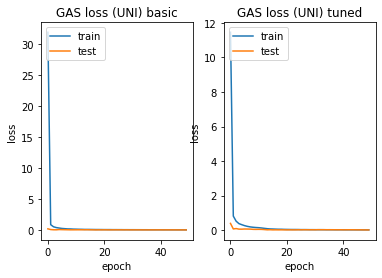

In [106]:
### to plot the loss functions 
plt.subplot(1, 2, 1)
plt.plot(history_tcn_gas_basic_uni_whole.history['loss'])
plt.plot(history_tcn_gas_basic_uni_whole.history['val_loss'])
plt.title('GAS loss (UNI) basic')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.subplot(1, 2, 2)
plt.plot(history_tcn_gas_uni_tuned_whole.history['loss'])
plt.plot(history_tcn_gas_uni_tuned_whole.history['val_loss'])
plt.title('GAS loss (UNI) tuned')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

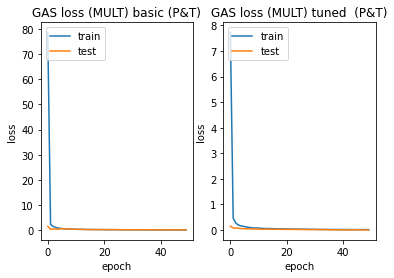

In [105]:
### to plot the loss functions 
plt.subplot(1, 2, 1)
plt.plot(history_tcn_gas_mult_basic_whole.history['loss'])
plt.plot(history_tcn_gas_mult_basic_whole.history['val_loss'])
plt.title('GAS loss (MULT) basic (P&T)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.subplot(1, 2, 2)
plt.plot(history_tcn_gas_mult_tuned_whole.history['loss'])
plt.plot(history_tcn_gas_mult_tuned_whole.history['val_loss'])
plt.title('GAS loss (MULT) tuned  (P&T)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

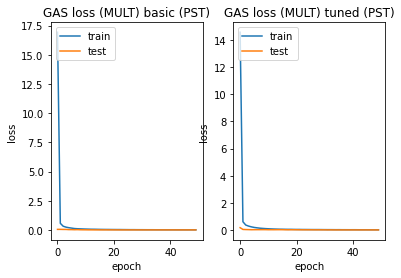

In [110]:
### to plot the loss functions 
plt.subplot(1, 2, 1)
plt.plot(history_tcn_gas_mult_basic_whole_pst.history['loss'])
plt.plot(history_tcn_gas_mult_basic_whole_pst.history['val_loss'])
plt.title('GAS loss (MULT) basic (PST)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.subplot(1, 2, 2)
plt.plot(history_tcn_gas_mult_tuned_whole_pst.history['loss'])
plt.plot(history_tcn_gas_mult_tuned_whole_pst.history['val_loss'])
plt.title('GAS loss (MULT) tuned (PST)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

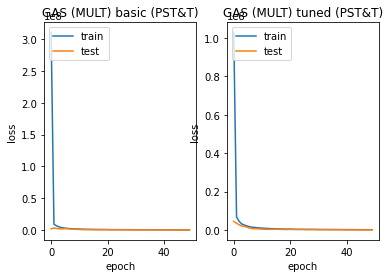

In [113]:
### to plot the loss functions 
plt.subplot(1, 2, 1)
plt.plot(history_tcn_gas_mult_basic_whole_pstT.history['loss'])
plt.plot(history_tcn_gas_mult_basic_whole_pstT.history['val_loss'])
plt.title('GAS (MULT) basic (PST&T)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.subplot(1, 2, 2)
plt.plot(history_tcn_gas_mult_tuned_whole_pstT.history['loss'])
plt.plot(history_tcn_gas_mult_tuned_whole_pstT.history['val_loss'])
plt.title('GAS (MULT) tuned (PST&T)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [36]:
# making plotings for testing univariate models
## whole day training 
tcn_gas_basic_uni_whole_Y = y_uni_test.flatten()
tcn_gas_basic_uni_whole_Pred = tcn_gas_basic_uni_whole.predict(x_uni_test).flatten()
df_plot_tcn_gas_basic_uni_whole=pd.DataFrame.from_dict(dict(zip(['prediction', 'real' ], np.array([ tcn_gas_basic_uni_whole_Pred, tcn_gas_basic_uni_whole_Y]))))
df_plot_tcn_gas_basic_uni_whole['ds']=range(0,len(tcn_gas_basic_uni_whole_Y))
tcn_gas_uni_tuned_whole_Y = y_uni_test.flatten()
##-----
tcn_gas_uni_tuned_whole_Pred = tcn_gas_uni_tuned_whole.predict(x_uni_test).flatten()
df_plot_tcn_gas_uni_tuned_whole=pd.DataFrame.from_dict(dict(zip(['prediction', 'real' ], np.array([ tcn_gas_uni_tuned_whole_Pred, tcn_gas_uni_tuned_whole_Y]))))
df_plot_tcn_gas_uni_tuned_whole['ds']=range(0,len(tcn_gas_uni_tuned_whole_Y))
## daily training without padding 
tcn_gas_basic_uni_daily_Y = y_uni_test.flatten()
tcn_gas_basic_uni_daily_Pred = tcn_gas_basic_uni_daily.predict(x_uni_test).flatten()
df_plot_tcn_gas_basic_uni_daily=pd.DataFrame.from_dict(dict(zip(['prediction', 'real' ], np.array([ tcn_gas_basic_uni_daily_Pred, tcn_gas_basic_uni_daily_Y]))))
df_plot_tcn_gas_basic_uni_daily['ds']=range(0,len(tcn_gas_basic_uni_daily_Y))
tcn_gas_uni_tuned_daily_Y = y_uni_test.flatten()
##------------
tcn_gas_uni_tuned_daily_Pred = tcn_gas_uni_tuned_daily.predict(x_uni_test).flatten()
df_plot_tcn_gas_uni_tuned_daily=pd.DataFrame.from_dict(dict(zip(['prediction', 'real' ], np.array([ tcn_gas_uni_tuned_daily_Pred, tcn_gas_uni_tuned_daily_Y]))))
df_plot_tcn_gas_uni_tuned_daily['ds']=range(0,len(tcn_gas_uni_tuned_daily_Y))
## daily training with padding 
tcn_gas_basic_uni_daily_pd_Y = y_uni_test_pd.flatten()
tcn_gas_basic_uni_daily_pd_Pred = tcn_gas_basic_uni_daily_pd.predict(x_uni_test_pd).flatten()
df_plot_tcn_gas_basic_uni_daily_pd=pd.DataFrame.from_dict(dict(zip(['prediction', 'real' ], np.array([ tcn_gas_basic_uni_daily_pd_Pred, tcn_gas_basic_uni_daily_pd_Y]))))
df_plot_tcn_gas_basic_uni_daily_pd['ds']=range(0,len(tcn_gas_basic_uni_daily_pd_Y))
##-----------
tcn_gas_uni_tuned_daily_pd_Y = y_uni_test_pd.flatten()
tcn_gas_uni_tuned_daily_pd_Pred = tcn_gas_uni_tuned_daily_pd.predict(x_uni_test_pd).flatten()
df_plot_tcn_gas_uni_tuned_daily_pd=pd.DataFrame.from_dict(dict(zip(['prediction', 'real' ], np.array([ tcn_gas_uni_tuned_daily_pd_Pred, tcn_gas_uni_tuned_daily_pd_Y]))))
df_plot_tcn_gas_uni_tuned_daily_pd['ds']=range(0,len(tcn_gas_uni_tuned_daily_Y))

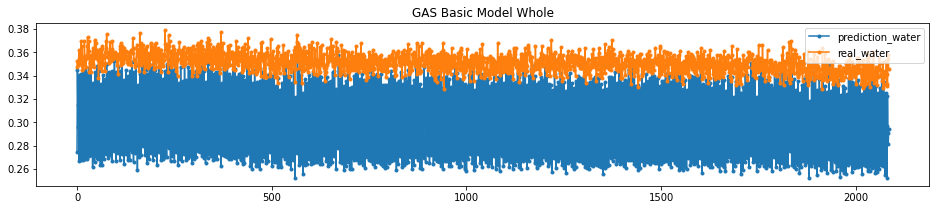

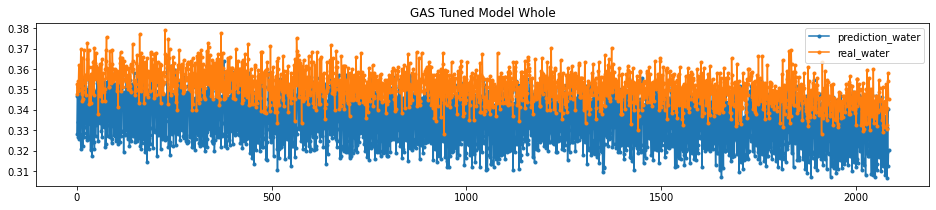

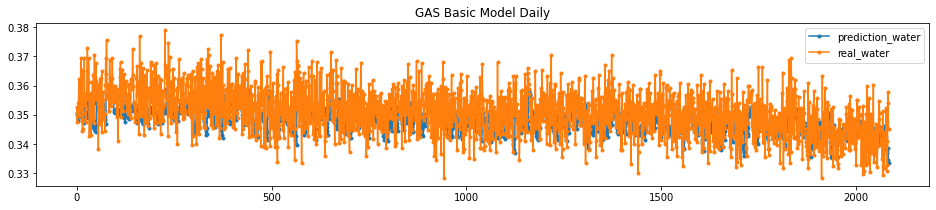

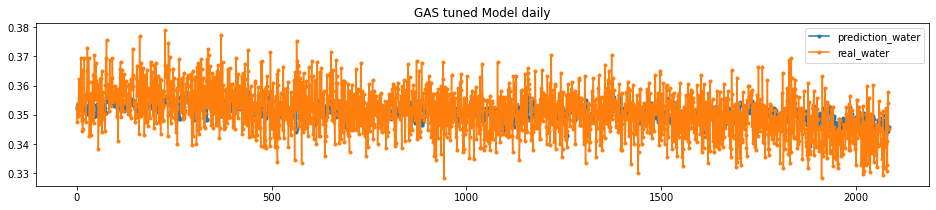

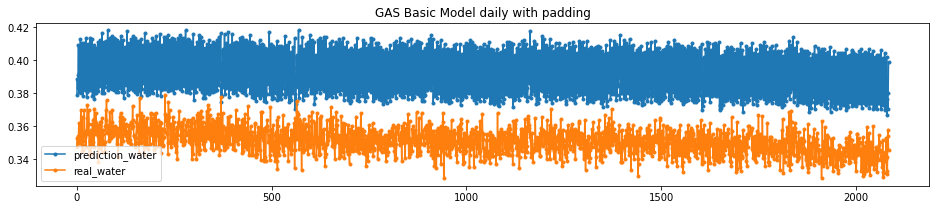

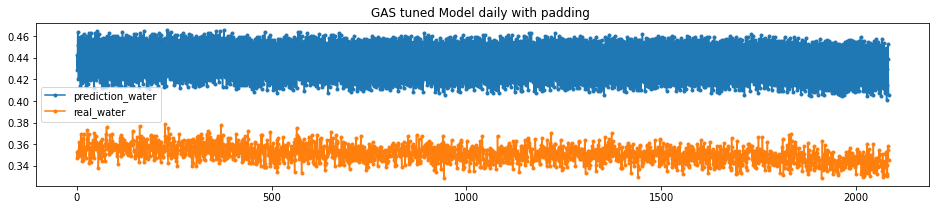

In [37]:
start = 0
end = len(df_plot_tcn_gas_uni_tuned_whole)
# whole basic 
fig,ax = plt.subplots(figsize=(16,3))
ax.set_title('GAS Basic Model Whole')
ax.plot(df_plot_tcn_gas_basic_uni_whole['ds'].iloc[start:end], df_plot_tcn_gas_basic_uni_whole['prediction'].iloc[start:end], marker=".", label='prediction_water')
ax.plot(df_plot_tcn_gas_basic_uni_whole['ds'].iloc[start:end], df_plot_tcn_gas_basic_uni_whole['real'].iloc[start:end], marker=".", label='real_water')
ax.legend()
# whole tuned  
fig,ax = plt.subplots(figsize=(16,3))
ax.set_title('GAS Tuned Model Whole')
ax.plot(df_plot_tcn_gas_uni_tuned_whole['ds'].iloc[start:end], df_plot_tcn_gas_uni_tuned_whole['prediction'].iloc[start:end], marker=".", label='prediction_water')
ax.plot(df_plot_tcn_gas_uni_tuned_whole['ds'].iloc[start:end], df_plot_tcn_gas_uni_tuned_whole['real'].iloc[start:end], marker=".", label='real_water')
ax.legend()
# daily basic without padding
fig,ax = plt.subplots(figsize=(16,3))
ax.set_title('GAS Basic Model Daily')
ax.plot(df_plot_tcn_gas_basic_uni_daily['ds'].iloc[start:end], df_plot_tcn_gas_basic_uni_daily['prediction'].iloc[start:end], marker=".", label='prediction_water')
ax.plot(df_plot_tcn_gas_basic_uni_daily['ds'].iloc[start:end], df_plot_tcn_gas_basic_uni_daily['real'].iloc[start:end], marker=".", label='real_water')
ax.legend()
# daily tuned without padding
fig,ax = plt.subplots(figsize=(16,3))
ax.set_title('GAS tuned Model daily')
ax.plot(df_plot_tcn_gas_uni_tuned_daily['ds'].iloc[start:end], df_plot_tcn_gas_uni_tuned_daily['prediction'].iloc[start:end], marker=".", label='prediction_water')
ax.plot(df_plot_tcn_gas_uni_tuned_daily['ds'].iloc[start:end], df_plot_tcn_gas_uni_tuned_daily['real'].iloc[start:end], marker=".", label='real_water')
ax.legend()
# daily basic with padding 
fig,ax = plt.subplots(figsize=(16,3))
ax.set_title('GAS Basic Model daily with padding')
ax.plot(df_plot_tcn_gas_basic_uni_daily_pd['ds'].iloc[start:end], df_plot_tcn_gas_basic_uni_daily_pd['prediction'].iloc[start:end], marker=".", label='prediction_water')
ax.plot(df_plot_tcn_gas_basic_uni_daily_pd['ds'].iloc[start:end], df_plot_tcn_gas_basic_uni_daily_pd['real'].iloc[start:end], marker=".", label='real_water')
ax.legend()
# daily tuned with padding 
fig,ax = plt.subplots(figsize=(16,3))
ax.set_title('GAS tuned Model daily with padding ')
ax.plot(df_plot_tcn_gas_uni_tuned_daily_pd['ds'].iloc[start:end], df_plot_tcn_gas_uni_tuned_daily_pd['prediction'].iloc[start:end], marker=".", label='prediction_water')
ax.plot(df_plot_tcn_gas_uni_tuned_daily_pd['ds'].iloc[start:end], df_plot_tcn_gas_uni_tuned_daily_pd['real'].iloc[start:end], marker=".", label='real_water')
ax.legend()

In [38]:
# making plotings for testing multivariate models --- PART 1 
## whole day training 
tcn_gas_mult_basic_whole_Y = y_mult_test.flatten()
tcn_gas_mult_basic_whole_Pred = tcn_gas_mult_basic_whole.predict(x_mult_test).flatten()
df_plot_tcn_gas_mult_basic_whole=pd.DataFrame.from_dict(dict(zip(['prediction', 'real' ], np.array([ tcn_gas_mult_basic_whole_Pred, tcn_gas_mult_basic_whole_Y]))))
df_plot_tcn_gas_mult_basic_whole['ds']=range(0,len(tcn_gas_mult_basic_whole_Y))
##---------
tcn_gas_mult_tuned_whole_Y = y_mult_test.flatten()
tcn_gas_mult_tuned_whole_Pred = tcn_gas_mult_tuned_whole.predict(x_mult_test).flatten()
df_plot_tcn_gas_mult_tuned_whole=pd.DataFrame.from_dict(dict(zip(['prediction', 'real' ], np.array([ tcn_gas_mult_tuned_whole_Pred, tcn_gas_mult_tuned_whole_Y]))))
df_plot_tcn_gas_mult_tuned_whole['ds']=range(0,len(tcn_gas_mult_tuned_whole_Y))
##---------
tcn_gas_mult_basic_whole_pst_Y = y_mult_test_pst.flatten()
tcn_gas_mult_basic_whole_pst_Pred = tcn_gas_mult_basic_whole_pst.predict(x_mult_test_pst).flatten()
df_plot_tcn_gas_mult_basic_whole_pst=pd.DataFrame.from_dict(dict(zip(['prediction', 'real' ], np.array([tcn_gas_mult_basic_whole_pst_Pred, tcn_gas_mult_basic_whole_pst_Y]))))
df_plot_tcn_gas_mult_basic_whole_pst['ds']=range(0,len(tcn_gas_mult_basic_whole_pst_Y))
##------------
tcn_gas_mult_tuned_whole_pst_Y = y_mult_test_pst.flatten()
tcn_gas_mult_tuned_whole_pst_Pred = tcn_gas_mult_tuned_whole_pst.predict(x_mult_test_pst).flatten()
df_plot_tcn_gas_mult_tuned_whole_pst=pd.DataFrame.from_dict(dict(zip(['prediction', 'real' ], np.array([ tcn_gas_mult_tuned_whole_pst_Pred, tcn_gas_mult_tuned_whole_pst_Y]))))
df_plot_tcn_gas_mult_tuned_whole_pst['ds']=range(0,len(tcn_gas_mult_tuned_whole_pst_Y))
##------------ 
tcn_gas_mult_basic_whole_pstT_Y = y_mult_test_pstT.flatten()
tcn_gas_mult_basic_whole_pstT_Pred = tcn_gas_mult_basic_whole_pstT.predict(x_mult_test_pstT).flatten()
df_plot_tcn_gas_mult_basic_whole_pstT=pd.DataFrame.from_dict(dict(zip(['prediction', 'real' ], np.array([ tcn_gas_mult_basic_whole_pstT_Pred, tcn_gas_mult_basic_whole_pstT_Y]))))
df_plot_tcn_gas_mult_basic_whole_pstT['ds']=range(0,len(tcn_gas_mult_basic_whole_pstT_Y))
##-----------
tcn_gas_mult_tuned_whole_pstT_Y = y_mult_test_pstT.flatten()
tcn_gas_mult_tuned_whole_pstT_Pred = tcn_gas_mult_tuned_whole_pstT.predict(x_mult_test_pstT).flatten()
df_plot_tcn_gas_mult_tuned_whole_pstT=pd.DataFrame.from_dict(dict(zip(['prediction', 'real' ], np.array([ tcn_gas_mult_tuned_whole_pstT_Pred, tcn_gas_mult_tuned_whole_pstT_Y]))))
df_plot_tcn_gas_mult_tuned_whole_pstT['ds']=range(0,len(tcn_gas_mult_tuned_whole_pstT_Y))

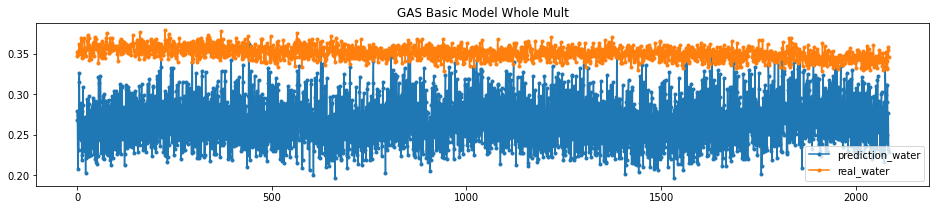

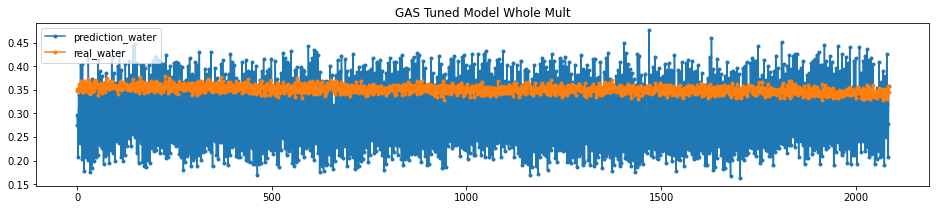

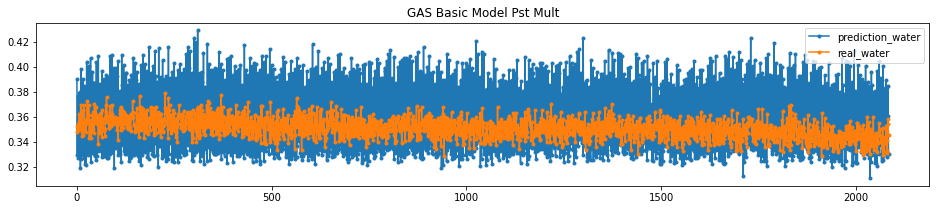

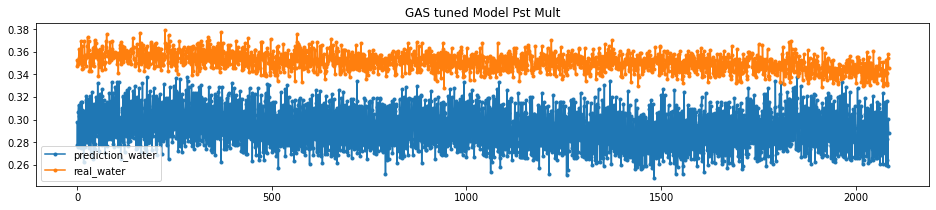

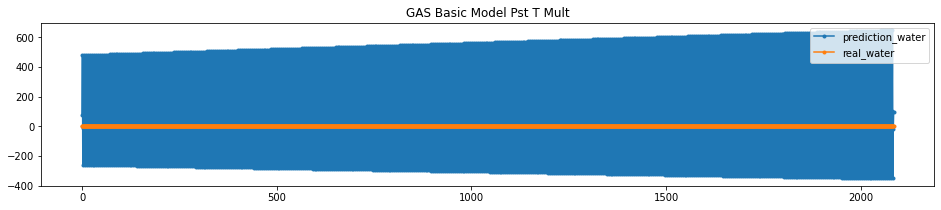

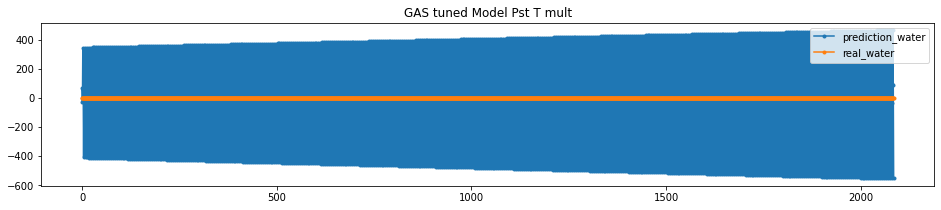

In [39]:
### whole multivariate training 
start = 0
end = len(df_plot_tcn_gas_uni_tuned_whole)
# whole basic 
fig,ax = plt.subplots(figsize=(16,3))
ax.set_title('GAS Basic Model Whole Mult')
ax.plot(df_plot_tcn_gas_mult_basic_whole['ds'].iloc[start:end], df_plot_tcn_gas_mult_basic_whole['prediction'].iloc[start:end], marker=".", label='prediction_water')
ax.plot(df_plot_tcn_gas_mult_basic_whole['ds'].iloc[start:end], df_plot_tcn_gas_mult_basic_whole['real'].iloc[start:end], marker=".", label='real_water')
ax.legend()
# whole tuned  
fig,ax = plt.subplots(figsize=(16,3))
ax.set_title('GAS Tuned Model Whole Mult')
ax.plot(df_plot_tcn_gas_mult_tuned_whole['ds'].iloc[start:end], df_plot_tcn_gas_mult_tuned_whole['prediction'].iloc[start:end], marker=".", label='prediction_water')
ax.plot(df_plot_tcn_gas_mult_tuned_whole['ds'].iloc[start:end], df_plot_tcn_gas_mult_tuned_whole['real'].iloc[start:end], marker=".", label='real_water')
ax.legend()
# basic with past readings
fig,ax = plt.subplots(figsize=(16,3))
ax.set_title('GAS Basic Model Pst Mult')
ax.plot(df_plot_tcn_gas_mult_basic_whole_pst['ds'].iloc[start:end], df_plot_tcn_gas_mult_basic_whole_pst['prediction'].iloc[start:end], marker=".", label='prediction_water')
ax.plot(df_plot_tcn_gas_mult_basic_whole_pst['ds'].iloc[start:end], df_plot_tcn_gas_mult_basic_whole_pst['real'].iloc[start:end], marker=".", label='real_water')
ax.legend()
# tuned with past readings 
fig,ax = plt.subplots(figsize=(16,3))
ax.set_title('GAS tuned Model Pst Mult')
ax.plot(df_plot_tcn_gas_mult_tuned_whole_pst['ds'].iloc[start:end], df_plot_tcn_gas_mult_tuned_whole_pst['prediction'].iloc[start:end], marker=".", label='prediction_water')
ax.plot(df_plot_tcn_gas_mult_tuned_whole_pst['ds'].iloc[start:end], df_plot_tcn_gas_mult_tuned_whole_pst['real'].iloc[start:end], marker=".", label='real_water')
ax.legend()
# basic with past readings and time 
fig,ax = plt.subplots(figsize=(16,3))
ax.set_title('GAS Basic Model Pst T Mult')
ax.plot(df_plot_tcn_gas_mult_basic_whole_pstT['ds'].iloc[start:end], df_plot_tcn_gas_mult_basic_whole_pstT['prediction'].iloc[start:end], marker=".", label='prediction_water')
ax.plot(df_plot_tcn_gas_mult_basic_whole_pstT['ds'].iloc[start:end], df_plot_tcn_gas_mult_basic_whole_pstT['real'].iloc[start:end], marker=".", label='real_water')
ax.legend()
# tuned with past readings and time 
fig,ax = plt.subplots(figsize=(16,3))
ax.set_title('GAS tuned Model Pst T mult')
ax.plot(df_plot_tcn_gas_mult_tuned_whole_pstT['ds'].iloc[start:end], df_plot_tcn_gas_mult_tuned_whole_pstT['prediction'].iloc[start:end], marker=".", label='prediction_water')
ax.plot(df_plot_tcn_gas_mult_tuned_whole_pstT['ds'].iloc[start:end], df_plot_tcn_gas_mult_tuned_whole_pstT['real'].iloc[start:end], marker=".", label='real_water')
ax.legend()

In [41]:
# making plotings for testing multivariate models --- PART 2 
## daily training 
tcn_gas_mult_basic_daily_Y = y_mult_test.flatten()
tcn_gas_mult_basic_daily_Pred = tcn_gas_mult_basic_daily.predict(x_mult_test).flatten()
df_plot_tcn_gas_mult_basic_daily=pd.DataFrame.from_dict(dict(zip(['prediction', 'real' ], np.array([ tcn_gas_mult_basic_daily_Pred, tcn_gas_mult_basic_daily_Y]))))
df_plot_tcn_gas_mult_basic_daily['ds']=range(0,len(tcn_gas_mult_basic_daily_Y))
##---------
tcn_gas_mult_tuned_daily_Y = y_mult_test.flatten()
tcn_gas_mult_tuned_daily_Pred = tcn_gas_mult_tuned_daily.predict(x_mult_test).flatten()
df_plot_tcn_gas_mult_tuned_daily=pd.DataFrame.from_dict(dict(zip(['prediction', 'real' ], np.array([ tcn_gas_mult_tuned_daily_Pred, tcn_gas_mult_tuned_daily_Y]))))
df_plot_tcn_gas_mult_tuned_daily['ds']=range(0,len(tcn_gas_mult_tuned_daily_Y))
##---------
tcn_gas_mult_basic_daily_pst_Y = y_mult_test_pst.flatten()
tcn_gas_mult_basic_daily_pst_Pred = tcn_gas_mult_basic_daily_pst.predict(x_mult_test_pst).flatten()
df_plot_tcn_gas_mult_basic_daily_pst=pd.DataFrame.from_dict(dict(zip(['prediction', 'real' ], np.array([tcn_gas_mult_basic_daily_pst_Pred, tcn_gas_mult_basic_daily_pst_Y]))))
df_plot_tcn_gas_mult_basic_daily_pst['ds']=range(0,len(tcn_gas_mult_basic_daily_pst_Y))
##------------
tcn_gas_mult_tuned_daily_pst_Y = y_mult_test_pst.flatten()
tcn_gas_mult_tuned_daily_pst_Pred = tcn_gas_mult_tuned_daily_pst.predict(x_mult_test_pst).flatten()
df_plot_tcn_gas_mult_tuned_daily_pst=pd.DataFrame.from_dict(dict(zip(['prediction', 'real' ], np.array([ tcn_gas_mult_tuned_daily_pst_Pred, tcn_gas_mult_tuned_daily_pst_Y]))))
df_plot_tcn_gas_mult_tuned_daily_pst['ds']=range(0,len(tcn_gas_mult_tuned_daily_pst_Y))
##------------ 
tcn_gas_mult_basic_daily_pstT_Y = y_mult_test_pstT.flatten()
tcn_gas_mult_basic_daily_pstT_Pred = tcn_gas_mult_basic_daily_pstT.predict(x_mult_test_pstT).flatten()
df_plot_tcn_gas_mult_basic_daily_pstT=pd.DataFrame.from_dict(dict(zip(['prediction', 'real' ], np.array([ tcn_gas_mult_basic_daily_pstT_Pred, tcn_gas_mult_basic_daily_pstT_Y]))))
df_plot_tcn_gas_mult_basic_daily_pstT['ds']=range(0,len(tcn_gas_mult_basic_daily_pstT_Y))
##-----------
tcn_gas_mult_tuned_daily_pstT_Y = y_mult_test_pstT.flatten()
tcn_gas_mult_tuned_daily_pstT_Pred = tcn_gas_mult_tuned_daily_pstT.predict(x_mult_test_pstT).flatten()
df_plot_tcn_gas_mult_tuned_daily_pstT=pd.DataFrame.from_dict(dict(zip(['prediction', 'real' ], np.array([ tcn_gas_mult_tuned_daily_pstT_Pred, tcn_gas_mult_tuned_daily_pstT_Y]))))
df_plot_tcn_gas_mult_tuned_daily_pstT['ds']=range(0,len(tcn_gas_mult_tuned_daily_pstT_Y))

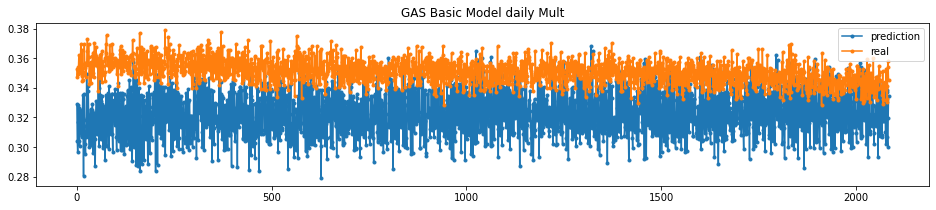

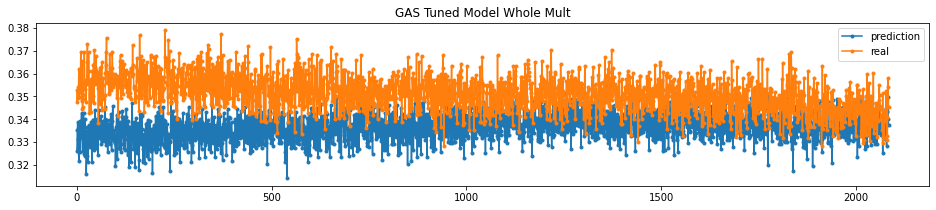

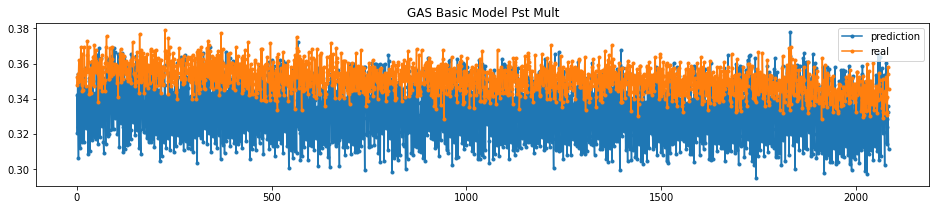

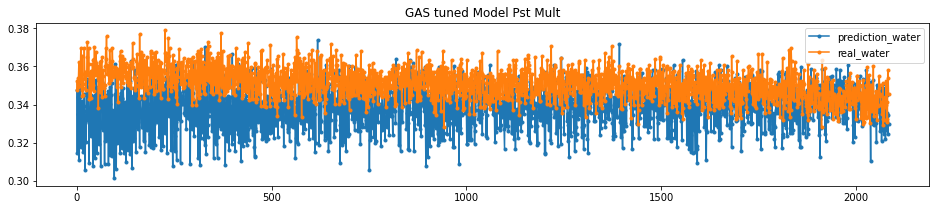

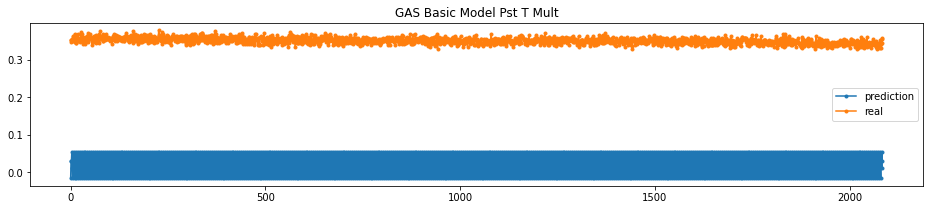

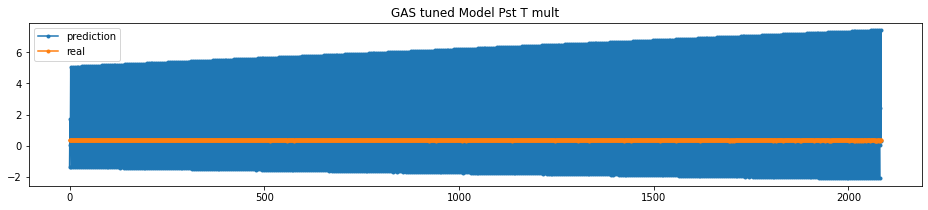

In [42]:
### daily without padding multivariate training 
start = 0
end = len(df_plot_tcn_gas_uni_tuned_whole)
# daily basic 
fig,ax = plt.subplots(figsize=(16,3))
ax.set_title('GAS Basic Model daily Mult')
ax.plot(df_plot_tcn_gas_mult_basic_daily['ds'].iloc[start:end], df_plot_tcn_gas_mult_basic_daily['prediction'].iloc[start:end], marker=".", label='prediction')
ax.plot(df_plot_tcn_gas_mult_basic_daily['ds'].iloc[start:end], df_plot_tcn_gas_mult_basic_daily['real'].iloc[start:end], marker=".", label='real')
ax.legend()
# daily tuned  
fig,ax = plt.subplots(figsize=(16,3))
ax.set_title('GAS Tuned Model Whole Mult')
ax.plot(df_plot_tcn_gas_mult_tuned_daily['ds'].iloc[start:end], df_plot_tcn_gas_mult_tuned_daily['prediction'].iloc[start:end], marker=".", label='prediction')
ax.plot(df_plot_tcn_gas_mult_tuned_daily['ds'].iloc[start:end], df_plot_tcn_gas_mult_tuned_daily['real'].iloc[start:end], marker=".", label='real')
ax.legend()
# basic with past readings
fig,ax = plt.subplots(figsize=(16,3))
ax.set_title('GAS Basic Model Pst Mult')
ax.plot(df_plot_tcn_gas_mult_basic_daily_pst['ds'].iloc[start:end], df_plot_tcn_gas_mult_basic_daily_pst['prediction'].iloc[start:end], marker=".", label='prediction')
ax.plot(df_plot_tcn_gas_mult_basic_daily_pst['ds'].iloc[start:end], df_plot_tcn_gas_mult_basic_daily_pst['real'].iloc[start:end], marker=".", label='real')
ax.legend()
# tuned with past readings 
fig,ax = plt.subplots(figsize=(16,3))
ax.set_title('GAS tuned Model Pst Mult')
ax.plot(df_plot_tcn_gas_mult_tuned_daily_pst['ds'].iloc[start:end], df_plot_tcn_gas_mult_tuned_daily_pst['prediction'].iloc[start:end], marker=".", label='prediction_water')
ax.plot(df_plot_tcn_gas_mult_tuned_daily_pst['ds'].iloc[start:end], df_plot_tcn_gas_mult_tuned_daily_pst['real'].iloc[start:end], marker=".", label='real_water')
ax.legend()
# basic with past readings and time 
fig,ax = plt.subplots(figsize=(16,3))
ax.set_title('GAS Basic Model Pst T Mult')
ax.plot(df_plot_tcn_gas_mult_basic_daily_pstT['ds'].iloc[start:end], df_plot_tcn_gas_mult_basic_daily_pstT['prediction'].iloc[start:end], marker=".", label='prediction')
ax.plot(df_plot_tcn_gas_mult_basic_daily_pstT['ds'].iloc[start:end], df_plot_tcn_gas_mult_basic_daily_pstT['real'].iloc[start:end], marker=".", label='real')
ax.legend()
# tuned with past readings and time 
fig,ax = plt.subplots(figsize=(16,3))
ax.set_title('GAS tuned Model Pst T mult')
ax.plot(df_plot_tcn_gas_mult_tuned_daily_pstT['ds'].iloc[start:end], df_plot_tcn_gas_mult_tuned_daily_pstT['prediction'].iloc[start:end], marker=".", label='prediction')
ax.plot(df_plot_tcn_gas_mult_tuned_daily_pstT['ds'].iloc[start:end], df_plot_tcn_gas_mult_tuned_daily_pstT['real'].iloc[start:end], marker=".", label='real')
ax.legend()

In [64]:
# making plotings for testing multivariate models --- PART 3
## daily training with padding 
tcn_gas_mult_basic_daily_pd_Y = y_mult_test_pd.flatten()
tcn_gas_mult_basic_daily_pd_Pred = tcn_gas_mult_basic_daily_pd.predict(x_mult_test_pd).flatten()
df_plot_tcn_gas_mult_basic_daily_pd=pd.DataFrame.from_dict(dict(zip(['prediction', 'real' ], np.array([ tcn_gas_mult_basic_daily_pd_Pred, tcn_gas_mult_basic_daily_pd_Y]))))
df_plot_tcn_gas_mult_basic_daily_pd['ds']=range(0,len(tcn_gas_mult_basic_daily_pd_Y))
##---------
tcn_gas_mult_tuned_daily_pd_Y = y_mult_test_pd.flatten()
tcn_gas_mult_tuned_daily_pd_Pred = tcn_gas_mult_tuned_daily_pd.predict(x_mult_test_pd).flatten()
df_plot_tcn_gas_mult_tuned_daily_pd=pd.DataFrame.from_dict(dict(zip(['prediction', 'real' ], np.array([ tcn_gas_mult_tuned_daily_pd_Pred, tcn_gas_mult_tuned_daily_pd_Y]))))
df_plot_tcn_gas_mult_tuned_daily_pd['ds']=range(0,len(tcn_gas_mult_tuned_daily_pd_Y))
##---------
tcn_gas_mult_basic_daily_pd_pst_Y = y_mult_test_pst_pd.flatten()
tcn_gas_mult_basic_daily_pd_pst_Pred = tcn_gas_mult_basic_daily_pd_pst.predict(x_mult_test_pst_pd).flatten()
df_plot_tcn_gas_mult_basic_daily_pd_pst=pd.DataFrame.from_dict(dict(zip(['prediction', 'real' ], np.array([tcn_gas_mult_basic_daily_pd_pst_Pred, tcn_gas_mult_basic_daily_pd_pst_Y]))))
df_plot_tcn_gas_mult_basic_daily_pd_pst['ds']=range(0,len(tcn_gas_mult_basic_daily_pd_pst_Y))
##------------
tcn_gas_mult_tuned_daily_pd_pst_Y = y_mult_test_pst_pd.flatten()
tcn_gas_mult_tuned_daily_pd_pst_Pred = tcn_gas_mult_tuned_daily_pd_pst.predict(x_mult_test_pst_pd).flatten()
df_plot_tcn_gas_mult_tuned_daily_pd_pst=pd.DataFrame.from_dict(dict(zip(['prediction', 'real' ], np.array([ tcn_gas_mult_tuned_daily_pd_pst_Pred, tcn_gas_mult_tuned_daily_pd_pst_Y]))))
df_plot_tcn_gas_mult_tuned_daily_pd_pst['ds']=range(0,len(tcn_gas_mult_tuned_daily_pd_pst_Y))
##------------ 
tcn_gas_mult_basic_daily_pd_pstT_Y = y_mult_test_pstT_pd.flatten()
tcn_gas_mult_basic_daily_pd_pstT_Pred = tcn_gas_mult_basic_daily_pd_pstT.predict(x_mult_test_pstT_pd).flatten()
df_plot_tcn_gas_mult_basic_daily_pd_pstT=pd.DataFrame.from_dict(dict(zip(['prediction', 'real' ], np.array([ tcn_gas_mult_basic_daily_pd_pstT_Pred, tcn_gas_mult_basic_daily_pd_pstT_Y]))))
df_plot_tcn_gas_mult_basic_daily_pd_pstT['ds']=range(0,len(tcn_gas_mult_basic_daily_pd_pstT_Y))
##-----------
tcn_gas_mult_tuned_daily_pd_pstT_Y = y_mult_test_pstT_pd.flatten()
tcn_gas_mult_tuned_daily_pd_pstT_Pred = tcn_gas_mult_tuned_daily_pd_pstT.predict(x_mult_test_pstT_pd).flatten()
df_plot_tcn_gas_mult_tuned_daily_pd_pstT=pd.DataFrame.from_dict(dict(zip(['prediction', 'real' ], np.array([ tcn_gas_mult_tuned_daily_pd_pstT_Pred, tcn_gas_mult_tuned_daily_pd_pstT_Y]))))
df_plot_tcn_gas_mult_tuned_daily_pd_pstT['ds']=range(0,len(tcn_gas_mult_tuned_daily_pd_pstT_Y))

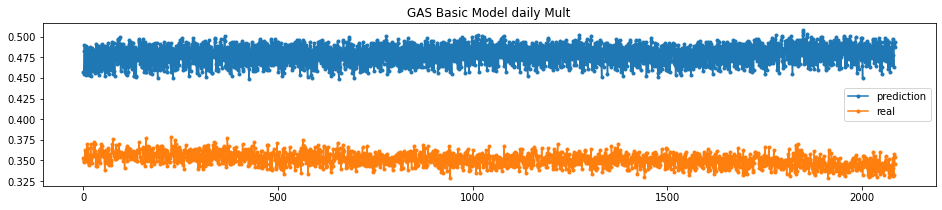

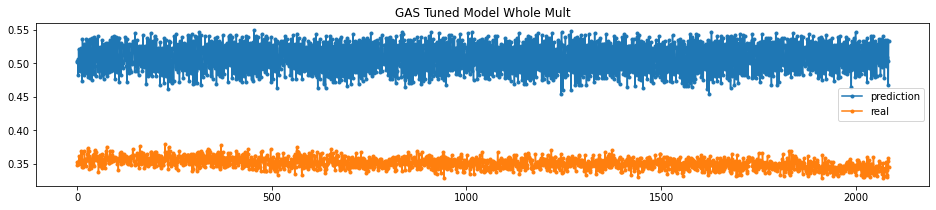

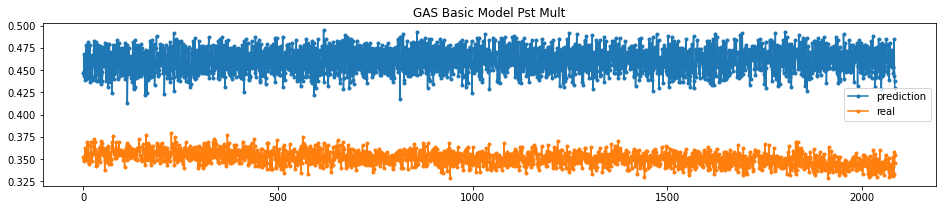

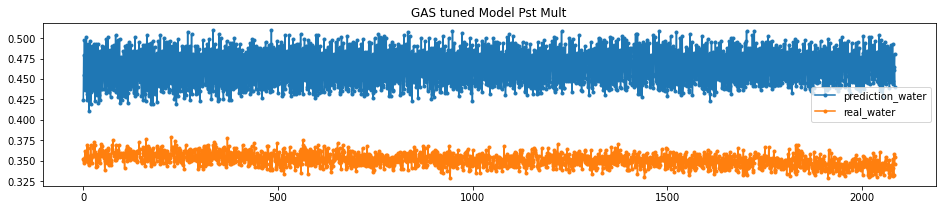

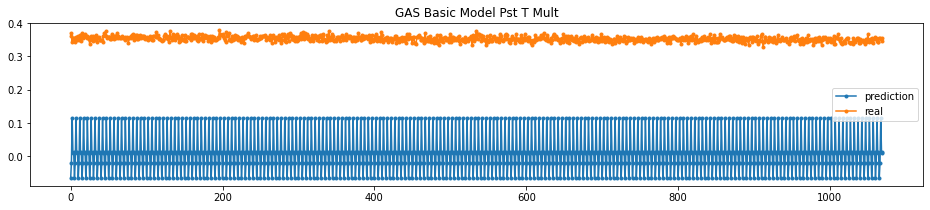

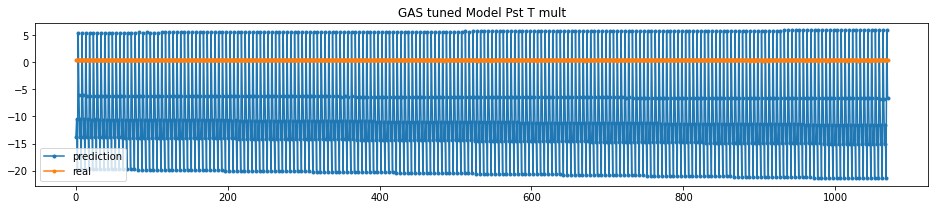

In [65]:
### daily with padding multivariate training 
start = 0
end = len(df_plot_tcn_gas_uni_tuned_whole)
# daily basic 
fig,ax = plt.subplots(figsize=(16,3))
ax.set_title('GAS Basic Model daily Mult')
ax.plot(df_plot_tcn_gas_mult_basic_daily_pd['ds'].iloc[start:end], df_plot_tcn_gas_mult_basic_daily_pd['prediction'].iloc[start:end], marker=".", label='prediction')
ax.plot(df_plot_tcn_gas_mult_basic_daily_pd['ds'].iloc[start:end], df_plot_tcn_gas_mult_basic_daily_pd['real'].iloc[start:end], marker=".", label='real')
ax.legend()
# daily tuned  
fig,ax = plt.subplots(figsize=(16,3))
ax.set_title('GAS Tuned Model Whole Mult')
ax.plot(df_plot_tcn_gas_mult_tuned_daily_pd['ds'].iloc[start:end], df_plot_tcn_gas_mult_tuned_daily_pd['prediction'].iloc[start:end], marker=".", label='prediction')
ax.plot(df_plot_tcn_gas_mult_tuned_daily_pd['ds'].iloc[start:end], df_plot_tcn_gas_mult_tuned_daily_pd['real'].iloc[start:end], marker=".", label='real')
ax.legend()
# basic with past readings
fig,ax = plt.subplots(figsize=(16,3))
ax.set_title('GAS Basic Model Pst Mult')
ax.plot(df_plot_tcn_gas_mult_basic_daily_pd_pst['ds'].iloc[start:end], df_plot_tcn_gas_mult_basic_daily_pd_pst['prediction'].iloc[start:end], marker=".", label='prediction')
ax.plot(df_plot_tcn_gas_mult_basic_daily_pd_pst['ds'].iloc[start:end], df_plot_tcn_gas_mult_basic_daily_pd_pst['real'].iloc[start:end], marker=".", label='real')
ax.legend()
# tuned with past readings 
fig,ax = plt.subplots(figsize=(16,3))
ax.set_title('GAS tuned Model Pst Mult')
ax.plot(df_plot_tcn_gas_mult_tuned_daily_pd_pst['ds'].iloc[start:end], df_plot_tcn_gas_mult_tuned_daily_pd_pst['prediction'].iloc[start:end], marker=".", label='prediction_water')
ax.plot(df_plot_tcn_gas_mult_tuned_daily_pd_pst['ds'].iloc[start:end], df_plot_tcn_gas_mult_tuned_daily_pd_pst['real'].iloc[start:end], marker=".", label='real_water')
ax.legend()
# basic with past readings and time 
fig,ax = plt.subplots(figsize=(16,3))
ax.set_title('GAS Basic Model Pst T Mult')
ax.plot(df_plot_tcn_gas_mult_basic_daily_pd_pstT['ds'].iloc[start:end], df_plot_tcn_gas_mult_basic_daily_pd_pstT['prediction'].iloc[start:end], marker=".", label='prediction')
ax.plot(df_plot_tcn_gas_mult_basic_daily_pd_pstT['ds'].iloc[start:end], df_plot_tcn_gas_mult_basic_daily_pd_pstT['real'].iloc[start:end], marker=".", label='real')
ax.legend()
# tuned with past readings and time 
fig,ax = plt.subplots(figsize=(16,3))
ax.set_title('GAS tuned Model Pst T mult')
ax.plot(df_plot_tcn_gas_mult_tuned_daily_pd_pstT['ds'].iloc[start:end], df_plot_tcn_gas_mult_tuned_daily_pd_pstT['prediction'].iloc[start:end], marker=".", label='prediction')
ax.plot(df_plot_tcn_gas_mult_tuned_daily_pd_pstT['ds'].iloc[start:end], df_plot_tcn_gas_mult_tuned_daily_pd_pstT['real'].iloc[start:end], marker=".", label='real')
ax.legend()